# Semana 3: Estadística Descriptiva

## Ciencia de Datos en el Deporte - Fundamentos con Python

---

**Objetivos de aprendizaje:**
- Comprender los conceptos fundamentales de estadística descriptiva
- Calcular medidas de tendencia central (media, mediana, moda)
- Calcular medidas de dispersión (desviación estándar, varianza, rango)
- Aplicar estadística descriptiva a datos futbolísticos
- Crear histogramas y visualizaciones estadísticas
- Interpretar resultados estadísticos en el contexto del fútbol

---

## 1. Teoría: Fundamentos de Estadística Descriptiva

### ¿Qué es la Estadística Descriptiva?

La estadística descriptiva es la rama de la estadística que se encarga de **resumir, organizar y presentar datos** de manera comprensible. Su objetivo principal es describir las características principales de un conjunto de datos sin hacer inferencias sobre una población más amplia.

### Importancia en el Análisis Deportivo

En el contexto del fútbol, la estadística descriptiva nos permite:
- **Resumir el rendimiento**: Obtener una visión general del desempeño de equipos y jugadores
- **Identificar patrones**: Detectar tendencias en goles, resultados, etc.
- **Comparar**: Establecer comparaciones objetivas entre equipos, ligas o temporadas
- **Comunicar hallazgos**: Presentar información de manera clara y comprensible

### Tipos de Medidas Estadísticas

#### 1.1 **Medidas de Tendencia Central**
Nos indican el "centro" o valor típico de los datos:

- **Media (promedio)**: Suma de todos los valores dividida por el número de observaciones
  - *Ejemplo*: Promedio de goles por partido
  - *Fórmula*: x̄ = Σx / n

- **Mediana**: Valor que divide los datos ordenados por la mitad
  - *Ejemplo*: Mediana de goles por equipo en una temporada
  - *Ventaja*: Menos sensible a valores extremos

- **Moda**: Valor que aparece con mayor frecuencia
  - *Ejemplo*: Resultado más común (1-0, 2-1, etc.)
  - *Aplicación*: Identificar patrones frecuentes

#### 1.2 **Medidas de Dispersión**
Nos indican qué tan esparcidos están los datos:

- **Rango**: Diferencia entre el valor máximo y mínimo
  - *Ejemplo*: Diferencia entre el máximo y mínimo de goles por partido
  - *Fórmula*: Rango = Máximo - Mínimo

- **Varianza**: Promedio de las desviaciones al cuadrado respecto a la media
  - *Fórmula*: σ² = Σ(x - x̄)² / n
  - *Interpretación*: Mayor varianza = mayor dispersión

- **Desviación Estándar**: Raíz cuadrada de la varianza
  - *Fórmula*: σ = √σ²
  - *Ventaja*: Mismas unidades que los datos originales

#### 1.3 **Medidas de Posición**
Nos indican la posición relativa de los datos:

- **Cuartiles**: Dividen los datos en 4 partes iguales
  - Q1 (25%), Q2 (50% = mediana), Q3 (75%)
- **Percentiles**: Dividen los datos en 100 partes iguales
- **Rango intercuartílico (IQR)**: Q3 - Q1

### Aplicaciones en Fútbol

| Medida | Aplicación en Fútbol | Ejemplo |
|--------|---------------------|----------|
| Media | Promedio de goles por partido | 2.5 goles/partido |
| Mediana | Valor central de puntos por temporada | 45 puntos |
| Moda | Resultado más frecuente | 1-0 |
| Desviación Estándar | Consistencia del rendimiento | Baja DS = más consistente |
| Cuartiles | Clasificación de equipos | Top 25% de la liga |

---

## 2. Configuración del Entorno y Carga de Datos

### Importación de Librerías

Para realizar análisis estadístico descriptivo, necesitamos las siguientes librerías:

- **pandas**: Para manipulación y análisis de datos
- **numpy**: Para cálculos numéricos y estadísticos
- **matplotlib**: Para visualizaciones básicas (base)
- **seaborn**: Para visualizaciones estadísticas modernas y elegantes
- **scipy**: Para funciones estadísticas adicionales

**✨ Ventajas de Seaborn para Estadística Descriptiva:**
- Gráficos estadísticos integrados (histogramas con KDE, box plots, violin plots)
- Manejo automático de tipos de datos categóricos y numéricos
- Estilos modernos y paletas de colores profesionales
- Integración directa con pandas DataFrames
- Menos código para gráficos más informativos

In [1]:
# Importar librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
from datetime import datetime, timedelta
import warnings

# Configurar warnings
warnings.filterwarnings('ignore')

# Configurar seaborn para visualización moderna
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configurar pandas para mostrar más columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Verificar versiones
print("✅ Librerías importadas exitosamente")
print(f"📊 Pandas versión: {pd.__version__}")
print(f"🔢 NumPy versión: {np.__version__}")
print(f"📈 Matplotlib versión: {plt.matplotlib.__version__}")
print(f"🎨 Seaborn versión: {sns.__version__}")
print(f"📊 SciPy versión: {scipy.__version__}")

print("\n🔧 Configuración aplicada:")
print("- Estilo de visualización: seaborn whitegrid")
print("- Tamaño de figura por defecto: 12x8")
print("- Paleta de colores: husl")
print("- Advertencias suprimidas")

✅ Librerías importadas exitosamente
📊 Pandas versión: 2.3.1
🔢 NumPy versión: 1.26.4
📈 Matplotlib versión: 3.10.3
🎨 Seaborn versión: 0.13.2
📊 SciPy versión: 1.15.3

🔧 Configuración aplicada:
- Estilo de visualización: seaborn whitegrid
- Tamaño de figura por defecto: 12x8
- Paleta de colores: husl
- Advertencias suprimidas


## 3. Carga de Datos Futbolísticos

Para practicar estadística descriptiva, crearemos un dataset simulado que represente estadísticas de jugadores de fútbol durante una temporada. Este dataset incluirá variables como:

- **Goles**: Número de goles anotados por jugador
- **Asistencias**: Número de asistencias realizadas
- **Minutos jugados**: Total de minutos en cancha
- **Partidos jugados**: Número de partidos disputados
- **Posición**: Posición del jugador en el campo
- **Edad**: Edad del jugador
- **Valor de mercado**: Valor estimado del jugador (en millones)

### 3.1 Creación del Dataset Simulado

Crearemos un dataset con 100 jugadores ficticios que nos permita explorar diferentes aspectos de la estadística descriptiva aplicada al fútbol.

In [2]:
# Crear dataset simulado de jugadores de fútbol
np.random.seed(42)  # Para reproducibilidad

# Definir posiciones y sus características típicas
posiciones = ['Delantero', 'Mediocampista', 'Defensor', 'Portero']
pesos_posiciones = [0.25, 0.35, 0.30, 0.10]  # Distribución típica en un equipo

# Generar datos base
n_jugadores = 100
jugadores_data = []

for i in range(n_jugadores):
    # Seleccionar posición
    posicion = np.random.choice(posiciones, p=pesos_posiciones)
    
    # Generar edad (18-35 años, con mayor concentración en 20-30)
    edad = int(np.random.normal(26, 4))
    edad = max(18, min(35, edad))
    
    # Generar partidos jugados (0-38 en una temporada típica)
    partidos = np.random.randint(5, 39)
    
    # Generar minutos jugados (depende de partidos y posición)
    if posicion == 'Portero':
        minutos_por_partido = np.random.normal(85, 10)
    else:
        minutos_por_partido = np.random.normal(70, 20)
    
    minutos_totales = int(max(0, partidos * minutos_por_partido))
    
    # Generar goles (depende de la posición)
    if posicion == 'Delantero':
        goles = np.random.poisson(12)
    elif posicion == 'Mediocampista':
        goles = np.random.poisson(5)
    elif posicion == 'Defensor':
        goles = np.random.poisson(2)
    else:  # Portero
        goles = np.random.poisson(0.1)
    
    # Generar asistencias (depende de la posición)
    if posicion == 'Delantero':
        asistencias = np.random.poisson(4)
    elif posicion == 'Mediocampista':
        asistencias = np.random.poisson(8)
    elif posicion == 'Defensor':
        asistencias = np.random.poisson(2)
    else:  # Portero
        asistencias = np.random.poisson(0.1)
    
    # Generar valor de mercado (en millones, depende de edad, goles, asistencias)
    valor_base = 5 + (goles * 0.5) + (asistencias * 0.3) + (partidos * 0.1)
    factor_edad = 1.2 if 22 <= edad <= 28 else 0.8 if edad > 30 else 1.0
    valor_mercado = round(valor_base * factor_edad * np.random.uniform(0.7, 1.3), 1)
    
    jugadores_data.append({
        'Nombre': f'Jugador_{i+1:03d}',
        'Posicion': posicion,
        'Edad': edad,
        'Partidos': partidos,
        'Minutos': minutos_totales,
        'Goles': goles,
        'Asistencias': asistencias,
        'Valor_Mercado': valor_mercado
    })

# Crear DataFrame
df_jugadores = pd.DataFrame(jugadores_data)

# Mostrar información básica del dataset
print("=== INFORMACIÓN DEL DATASET ===")
print(f"Número total de jugadores: {len(df_jugadores)}")
print(f"Columnas disponibles: {list(df_jugadores.columns)}")
print(f"Tipos de datos:")
print(df_jugadores.dtypes)
print("\n=== PRIMERAS 5 FILAS ===")
print(df_jugadores.head())
print("\n=== DISTRIBUCIÓN POR POSICIÓN ===")
print(df_jugadores['Posicion'].value_counts())

=== INFORMACIÓN DEL DATASET ===
Número total de jugadores: 100
Columnas disponibles: ['Nombre', 'Posicion', 'Edad', 'Partidos', 'Minutos', 'Goles', 'Asistencias', 'Valor_Mercado']
Tipos de datos:
Nombre            object
Posicion          object
Edad               int64
Partidos           int64
Minutos            int64
Goles              int64
Asistencias        int64
Valor_Mercado    float64
dtype: object

=== PRIMERAS 5 FILAS ===
        Nombre       Posicion  Edad  Partidos  Minutos  Goles  Asistencias  \
0  Jugador_001  Mediocampista    21        23     1756      3            4   
1  Jugador_002       Defensor    26        32     1966      2            3   
2  Jugador_003       Defensor    24        29     2012      3            2   
3  Jugador_004      Delantero    25         8      622     10            8   
4  Jugador_005      Delantero    21        22      843     12            4   

   Valor_Mercado  
0           13.0  
1           14.7  
2           12.0  
3           13.0  


## 4. Análisis de Medidas de Tendencia Central

### 4.1 Introducción Práctica

Las medidas de tendencia central nos ayudan a entender el **valor típico** o **central** de nuestros datos. En el contexto del fútbol, estas medidas nos permiten:

- 📊 **Resumir rendimiento**: ¿Cuál es el promedio de goles por jugador?
- 🎯 **Establecer expectativas**: ¿Qué se considera un rendimiento "normal"?
- 📈 **Comparar**: ¿Cómo se compara un jugador con el resto?
- 🔍 **Detectar valores atípicos**: ¿Hay jugadores con rendimiento excepcional?

### 4.2 Análisis por Variable

Vamos a calcular las tres medidas principales para cada variable numérica de nuestro dataset:

- **Media (μ)**: Promedio aritmético
- **Mediana (M)**: Valor central cuando los datos están ordenados
- **Moda**: Valor más frecuente

In [3]:
# Calcular medidas de tendencia central para variables numéricas
def calcular_tendencia_central(serie, nombre_variable):
    """
    Calcula y muestra las medidas de tendencia central para una serie de datos
    """
    print(f"\n🔢 === {nombre_variable.upper()} ===")
    print(f"📊 Media (promedio): {serie.mean():.2f}")
    print(f"📈 Mediana (valor central): {serie.median():.2f}")
    
    # Para la moda, manejamos el caso donde puede haber múltiples modas
    moda = serie.mode()
    if len(moda) == 1:
        print(f"🎯 Moda (más frecuente): {moda.iloc[0]}")
    elif len(moda) > 1:
        print(f"🎯 Modas (valores más frecuentes): {moda.tolist()}")
    else:
        print("🎯 Moda: No hay moda definida")
    
    # Información adicional
    print(f"📏 Rango: {serie.min():.2f} - {serie.max():.2f}")
    print(f"🔄 Diferencia media-mediana: {abs(serie.mean() - serie.median()):.2f}")
    
    # Interpretación de la diferencia media-mediana
    if abs(serie.mean() - serie.median()) < 0.5:
        print("✅ Distribución aproximadamente simétrica")
    elif serie.mean() > serie.median():
        print("📊 Distribución sesgada hacia la derecha (valores altos)")
    else:
        print("📊 Distribución sesgada hacia la izquierda (valores bajos)")
    
    return {
        'media': serie.mean(),
        'mediana': serie.median(),
        'moda': moda.iloc[0] if len(moda) == 1 else moda.tolist(),
        'rango_min': serie.min(),
        'rango_max': serie.max()
    }

# Análisis de las variables numéricas principales
print("🎯 ANÁLISIS DE MEDIDAS DE TENDENCIA CENTRAL")
print("=" * 50)

# Variables para analizar
variables_analizar = ['Goles', 'Asistencias', 'Minutos', 'Partidos', 'Edad', 'Valor_Mercado']

resultados_tendencia = {}

for variable in variables_analizar:
    resultados_tendencia[variable] = calcular_tendencia_central(
        df_jugadores[variable], 
        variable
    )

print("\n" + "=" * 50)
print("📋 RESUMEN DE MEDIDAS DE TENDENCIA CENTRAL")
print("=" * 50)

# Crear tabla resumen
resumen_df = pd.DataFrame(resultados_tendencia).T
resumen_df.columns = ['Media', 'Mediana', 'Moda', 'Mín', 'Máx']
print(resumen_df.round(2))

🎯 ANÁLISIS DE MEDIDAS DE TENDENCIA CENTRAL

🔢 === GOLES ===
📊 Media (promedio): 7.13
📈 Mediana (valor central): 5.50
🎯 Moda (más frecuente): 4
📏 Rango: 0.00 - 24.00
🔄 Diferencia media-mediana: 1.63
📊 Distribución sesgada hacia la derecha (valores altos)

🔢 === ASISTENCIAS ===
📊 Media (promedio): 4.46
📈 Mediana (valor central): 4.00
🎯 Moda (más frecuente): 2
📏 Rango: 0.00 - 12.00
🔄 Diferencia media-mediana: 0.46
✅ Distribución aproximadamente simétrica

🔢 === MINUTOS ===
📊 Media (promedio): 1573.78
📈 Mediana (valor central): 1514.00
🎯 Modas (valores más frecuentes): [743, 2030, 2869]
📏 Rango: 311.00 - 3577.00
🔄 Diferencia media-mediana: 59.78
📊 Distribución sesgada hacia la derecha (valores altos)

🔢 === PARTIDOS ===
📊 Media (promedio): 23.18
📈 Mediana (valor central): 26.00
🎯 Moda (más frecuente): 27
📏 Rango: 5.00 - 38.00
🔄 Diferencia media-mediana: 2.82
📊 Distribución sesgada hacia la izquierda (valores bajos)

🔢 === EDAD ===
📊 Media (promedio): 25.07
📈 Mediana (valor central): 25.00


In [4]:
# Análisis de tendencia central por posición
print("\n🎯 ANÁLISIS POR POSICIÓN")
print("=" * 60)

# Análisis de goles por posición
print("\n⚽ GOLES POR POSICIÓN")
print("-" * 40)

goles_por_posicion = df_jugadores.groupby('Posicion')['Goles'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

goles_por_posicion.columns = ['Cantidad', 'Media', 'Mediana', 'Desv_Std', 'Mín', 'Máx']
print(goles_por_posicion)

# Análisis de asistencias por posición
print("\n🎯 ASISTENCIAS POR POSICIÓN")
print("-" * 40)

asistencias_por_posicion = df_jugadores.groupby('Posicion')['Asistencias'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

asistencias_por_posicion.columns = ['Cantidad', 'Media', 'Mediana', 'Desv_Std', 'Mín', 'Máx']
print(asistencias_por_posicion)

# Análisis de valor de mercado por posición
print("\n💰 VALOR DE MERCADO POR POSICIÓN")
print("-" * 40)

valor_por_posicion = df_jugadores.groupby('Posicion')['Valor_Mercado'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

valor_por_posicion.columns = ['Cantidad', 'Media', 'Mediana', 'Desv_Std', 'Mín', 'Máx']
print(valor_por_posicion)

# Insights principales
print("\n🔍 INSIGHTS PRINCIPALES:")
print("-" * 40)

# Posición con más goles en promedio
pos_mas_goles = goles_por_posicion['Media'].idxmax()
print(f"⚽ Posición con más goles promedio: {pos_mas_goles} ({goles_por_posicion.loc[pos_mas_goles, 'Media']:.2f} goles)")

# Posición con más asistencias en promedio
pos_mas_asistencias = asistencias_por_posicion['Media'].idxmax()
print(f"🎯 Posición con más asistencias promedio: {pos_mas_asistencias} ({asistencias_por_posicion.loc[pos_mas_asistencias, 'Media']:.2f} asistencias)")

# Posición con mayor valor de mercado
pos_mas_valor = valor_por_posicion['Media'].idxmax()
print(f"💰 Posición con mayor valor de mercado: {pos_mas_valor} ({valor_por_posicion.loc[pos_mas_valor, 'Media']:.2f} millones)")

# Posición más consistente en goles (menor desviación estándar)
pos_consistente = goles_por_posicion['Desv_Std'].idxmin()
print(f"📊 Posición más consistente en goles: {pos_consistente} (σ = {goles_por_posicion.loc[pos_consistente, 'Desv_Std']:.2f})")


🎯 ANÁLISIS POR POSICIÓN

⚽ GOLES POR POSICIÓN
----------------------------------------
               Cantidad  Media  Mediana  Desv_Std  Mín  Máx
Posicion                                                   
Defensor             23   2.52      2.0      1.38    0    5
Delantero            38  12.66     13.0      4.23    5   24
Mediocampista        33   5.27      5.0      2.43    1   10
Portero               6   0.00      0.0      0.00    0    0

🎯 ASISTENCIAS POR POSICIÓN
----------------------------------------
               Cantidad  Media  Mediana  Desv_Std  Mín  Máx
Posicion                                                   
Defensor             23   1.61      2.0      1.03    0    4
Delantero            38   4.08      4.0      1.79    1    8
Mediocampista        33   7.67      8.0      2.78    2   12
Portero               6   0.17      0.0      0.41    0    1

💰 VALOR DE MERCADO POR POSICIÓN
----------------------------------------
               Cantidad  Media  Mediana  Desv_Std

### 4.3 Visualización de Medidas de Tendencia Central

Las visualizaciones nos ayudan a **entender mejor** la distribución de los datos y la relación entre las diferentes medidas de tendencia central.

#### Tipos de Visualizaciones Útiles:

1. **Histogramas**: Muestran la distribución de frecuencias
2. **Box plots**: Resumen visual de medidas de posición
3. **Gráficos de barras**: Para comparar medias entre grupos
4. **Líneas de tendencia**: Para mostrar media, mediana y moda

#### Interpretación Visual:

- **Distribución simétrica**: Media ≈ Mediana
- **Sesgada a la derecha**: Media > Mediana
- **Sesgada a la izquierda**: Media < Mediana

### 4.4 Comparación: Matplotlib vs Seaborn para Estadística Descriptiva

**🎓 Ejemplo Educativo: Mismo análisis, diferentes enfoques**

A continuación mostramos cómo el mismo análisis estadístico se puede realizar tanto con matplotlib "puro" como con seaborn, destacando las ventajas de usar seaborn para estadística descriptiva.

🎯 COMPARACIÓN PRÁCTICA: MATPLOTLIB VS SEABORN

📊 Analizando: Goles
Media: 7.13, Mediana: 5.50, Std: 5.47


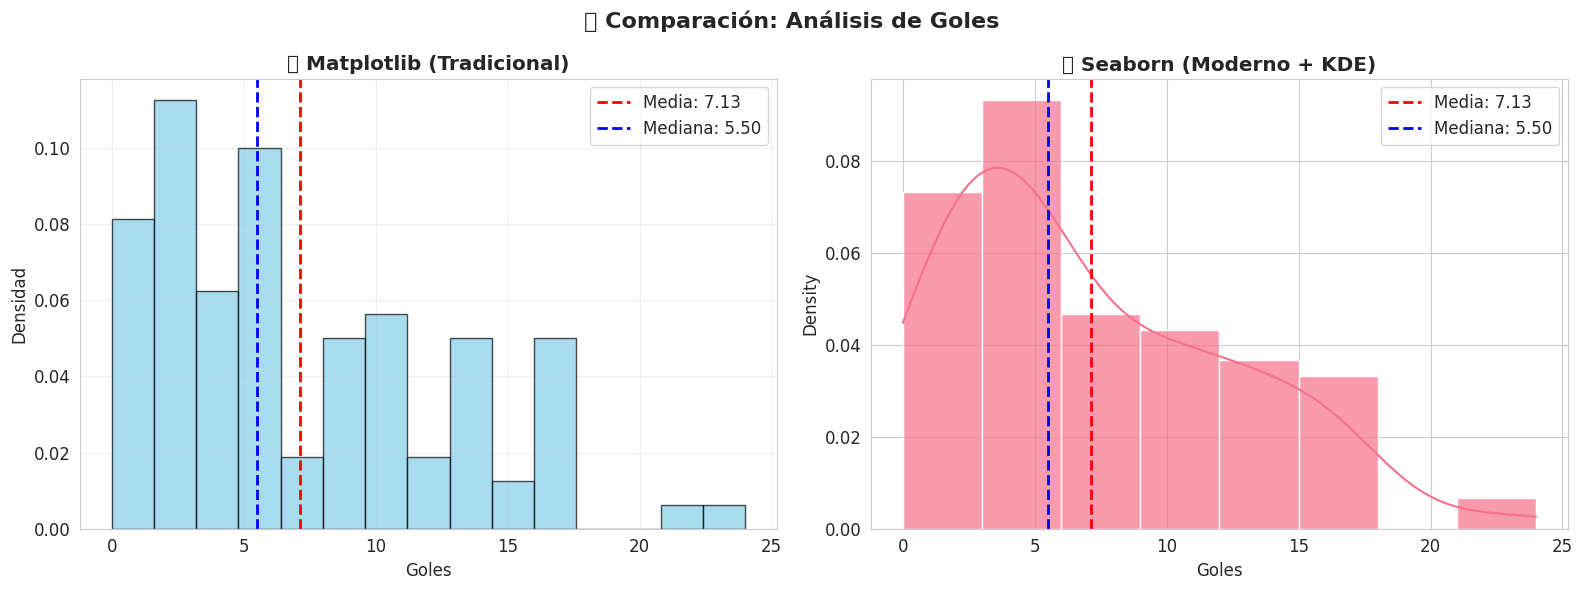

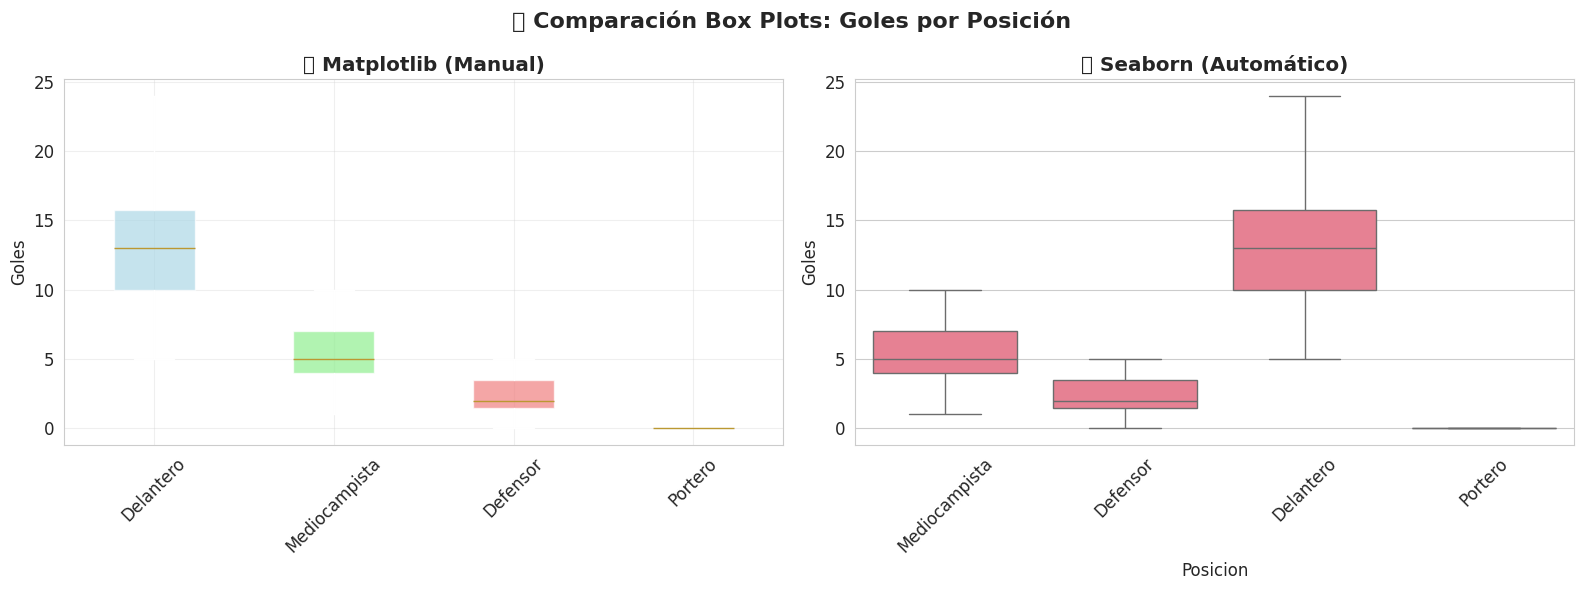


💡 VENTAJAS DE SEABORN PARA ESTADÍSTICA DESCRIPTIVA:
------------------------------------------------------------
✅ Menos código: Una línea vs múltiples líneas
✅ KDE automático: Curva de densidad incluida
✅ Integración pandas: Manejo directo de DataFrames
✅ Estilos consistentes: Colores y formato profesional
✅ Estadísticas automáticas: Cuartiles y outliers visibles
✅ Manejo de categorías: Agrupación automática por variables categóricas

🔧 COMPARACIÓN DE CÓDIGO:
----------------------------------------
📈 MATPLOTLIB (6+ líneas):
ax.hist(data, bins=15, color='skyblue', alpha=0.7, edgecolor='black')
ax.axvline(mean, color='red', linestyle='--', label='Media')
ax.set_xlabel(), ax.set_ylabel(), ax.legend(), ax.grid()
+ configuración manual de colores y estilos

🎨 SEABORN (1-2 líneas):
sns.histplot(data=df, x='variable', kde=True)
# ¡KDE, colores y formato incluidos automáticamente!


In [5]:
# Comparación práctica: Matplotlib vs Seaborn para análisis estadístico
print("🎯 COMPARACIÓN PRÁCTICA: MATPLOTLIB VS SEABORN")
print("=" * 60)

# Analizar la variable 'Goles' como ejemplo
variable_ejemplo = 'Goles'
data_ejemplo = df_jugadores[variable_ejemplo]

print(f"\n📊 Analizando: {variable_ejemplo}")
print(f"Media: {data_ejemplo.mean():.2f}, Mediana: {data_ejemplo.median():.2f}, Std: {data_ejemplo.std():.2f}")

# Crear comparación lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'📊 Comparación: Análisis de {variable_ejemplo}', fontsize=16, fontweight='bold')

# MATPLOTLIB (Enfoque tradicional)
ax1.hist(data_ejemplo, bins=15, color='skyblue', alpha=0.7, edgecolor='black', density=True)
ax1.axvline(data_ejemplo.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {data_ejemplo.mean():.2f}')
ax1.axvline(data_ejemplo.median(), color='blue', linestyle='--', linewidth=2, label=f'Mediana: {data_ejemplo.median():.2f}')
ax1.set_title('📈 Matplotlib (Tradicional)', fontweight='bold')
ax1.set_xlabel(variable_ejemplo)
ax1.set_ylabel('Densidad')
ax1.legend()
ax1.grid(True, alpha=0.3)

# SEABORN (Enfoque moderno)
sns.histplot(data=df_jugadores, x=variable_ejemplo, kde=True, stat='density', ax=ax2, alpha=0.7)
ax2.axvline(data_ejemplo.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {data_ejemplo.mean():.2f}')
ax2.axvline(data_ejemplo.median(), color='blue', linestyle='--', linewidth=2, label=f'Mediana: {data_ejemplo.median():.2f}')
ax2.set_title('🎨 Seaborn (Moderno + KDE)', fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

# Análisis por posición: comparación de enfoques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'📦 Comparación Box Plots: {variable_ejemplo} por Posición', fontsize=16, fontweight='bold')

# MATPLOTLIB (manual)
box_data = [df_jugadores[df_jugadores['Posicion'] == pos][variable_ejemplo] for pos in posiciones]
bp = ax1.boxplot(box_data, labels=posiciones, patch_artist=True)
colores_box = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(bp['boxes'], colores_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax1.set_title('📈 Matplotlib (Manual)', fontweight='bold')
ax1.set_ylabel(variable_ejemplo)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# SEABORN (automático)
sns.boxplot(data=df_jugadores, x='Posicion', y=variable_ejemplo, ax=ax2)
ax2.set_title('🎨 Seaborn (Automático)', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n💡 VENTAJAS DE SEABORN PARA ESTADÍSTICA DESCRIPTIVA:")
print("-" * 60)
print("✅ Menos código: Una línea vs múltiples líneas")
print("✅ KDE automático: Curva de densidad incluida")
print("✅ Integración pandas: Manejo directo de DataFrames")
print("✅ Estilos consistentes: Colores y formato profesional")
print("✅ Estadísticas automáticas: Cuartiles y outliers visibles")
print("✅ Manejo de categorías: Agrupación automática por variables categóricas")

# Demostración de código más limpio
print("\n🔧 COMPARACIÓN DE CÓDIGO:")
print("-" * 40)
print("📈 MATPLOTLIB (6+ líneas):")
print("ax.hist(data, bins=15, color='skyblue', alpha=0.7, edgecolor='black')")
print("ax.axvline(mean, color='red', linestyle='--', label='Media')")
print("ax.set_xlabel(), ax.set_ylabel(), ax.legend(), ax.grid()")
print("+ configuración manual de colores y estilos")

print("\n🎨 SEABORN (1-2 líneas):")
print("sns.histplot(data=df, x='variable', kde=True)")
print("# ¡KDE, colores y formato incluidos automáticamente!")

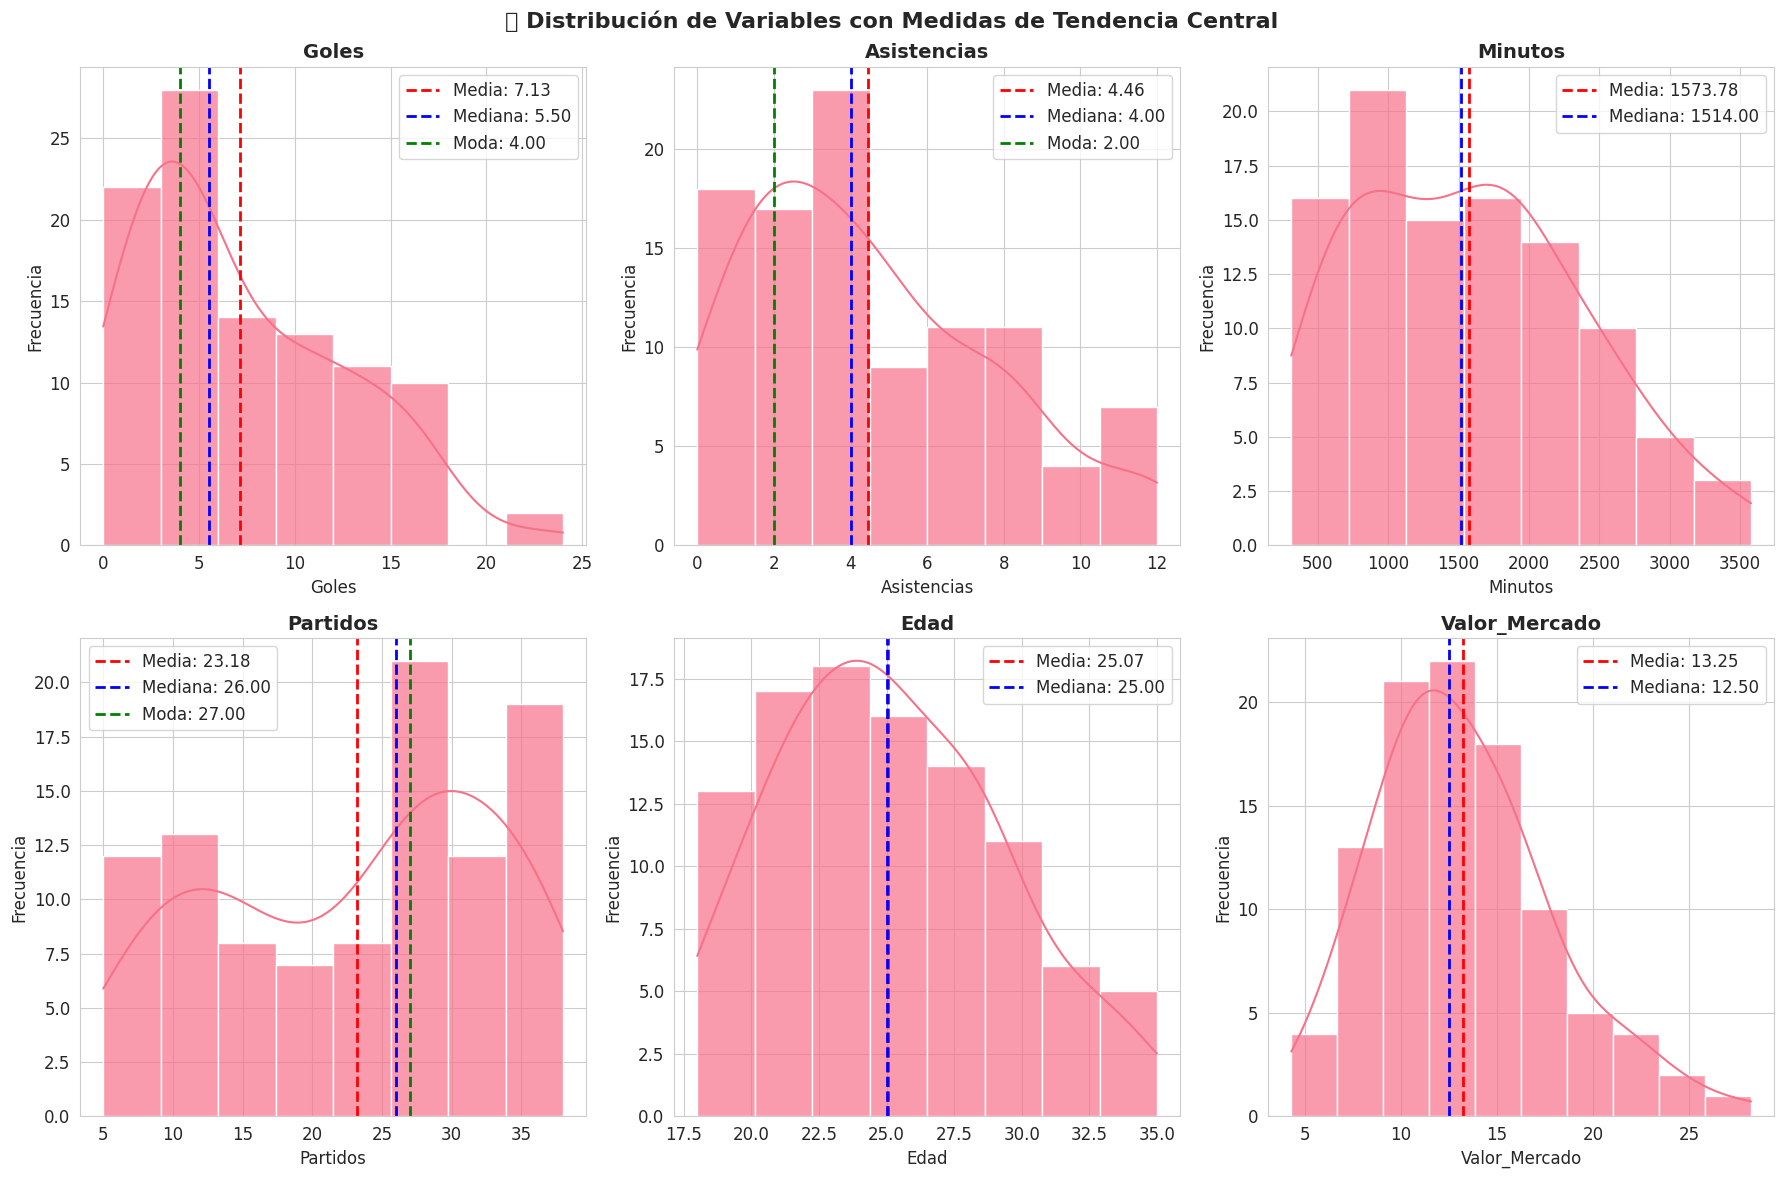


📊 ANÁLISIS DE DISTRIBUCIÓN DE VARIABLES

Goles:
  Media: 7.13
  Mediana: 5.50
  Diferencia: 1.63
  Distribución: Sesgada a la derecha ➡️

Asistencias:
  Media: 4.46
  Mediana: 4.00
  Diferencia: 0.46
  Distribución: Simétrica ⚖️

Minutos:
  Media: 1573.78
  Mediana: 1514.00
  Diferencia: 59.78
  Distribución: Sesgada a la derecha ➡️

Partidos:
  Media: 23.18
  Mediana: 26.00
  Diferencia: 2.82
  Distribución: Sesgada a la izquierda ⬅️

Edad:
  Media: 25.07
  Mediana: 25.00
  Diferencia: 0.07
  Distribución: Simétrica ⚖️

Valor_Mercado:
  Media: 13.25
  Mediana: 12.50
  Diferencia: 0.75
  Distribución: Sesgada a la derecha ➡️


In [6]:
# Crear visualizaciones de medidas de tendencia central con seaborn
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('📊 Distribución de Variables con Medidas de Tendencia Central', fontsize=16, fontweight='bold')

# Variables para visualizar
variables_viz = ['Goles', 'Asistencias', 'Minutos', 'Partidos', 'Edad', 'Valor_Mercado']

for i, variable in enumerate(variables_viz):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Crear histograma con KDE usando seaborn
    data = df_jugadores[variable]
    sns.histplot(data=df_jugadores, x=variable, kde=True, ax=ax, alpha=0.7)
    
    # Calcular medidas
    media = data.mean()
    mediana = data.median()
    moda = data.mode()
    
    # Añadir líneas verticales para las medidas
    ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    ax.axvline(mediana, color='blue', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
    
    # Añadir moda solo si existe y es única
    if len(moda) == 1:
        ax.axvline(moda.iloc[0], color='green', linestyle='--', linewidth=2, label=f'Moda: {moda.iloc[0]:.2f}')
    
    # Configurar el gráfico
    ax.set_title(f'{variable}', fontsize=14, fontweight='bold')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frecuencia')
    ax.legend()

plt.tight_layout()
plt.show()

# Análisis de distribución
print("\n📊 ANÁLISIS DE DISTRIBUCIÓN DE VARIABLES")
print("=" * 50)

for variable in variables_viz:
    data = df_jugadores[variable]
    media = data.mean()
    mediana = data.median()
    
    print(f"\n{variable}:")
    print(f"  Media: {media:.2f}")
    print(f"  Mediana: {mediana:.2f}")
    print(f"  Diferencia: {abs(media - mediana):.2f}")
    
    if abs(media - mediana) < 0.5:
        distribucion = "Simétrica ⚖️"
    elif media > mediana:
        distribucion = "Sesgada a la derecha ➡️"
    else:
        distribucion = "Sesgada a la izquierda ⬅️"
    
    print(f"  Distribución: {distribucion}")

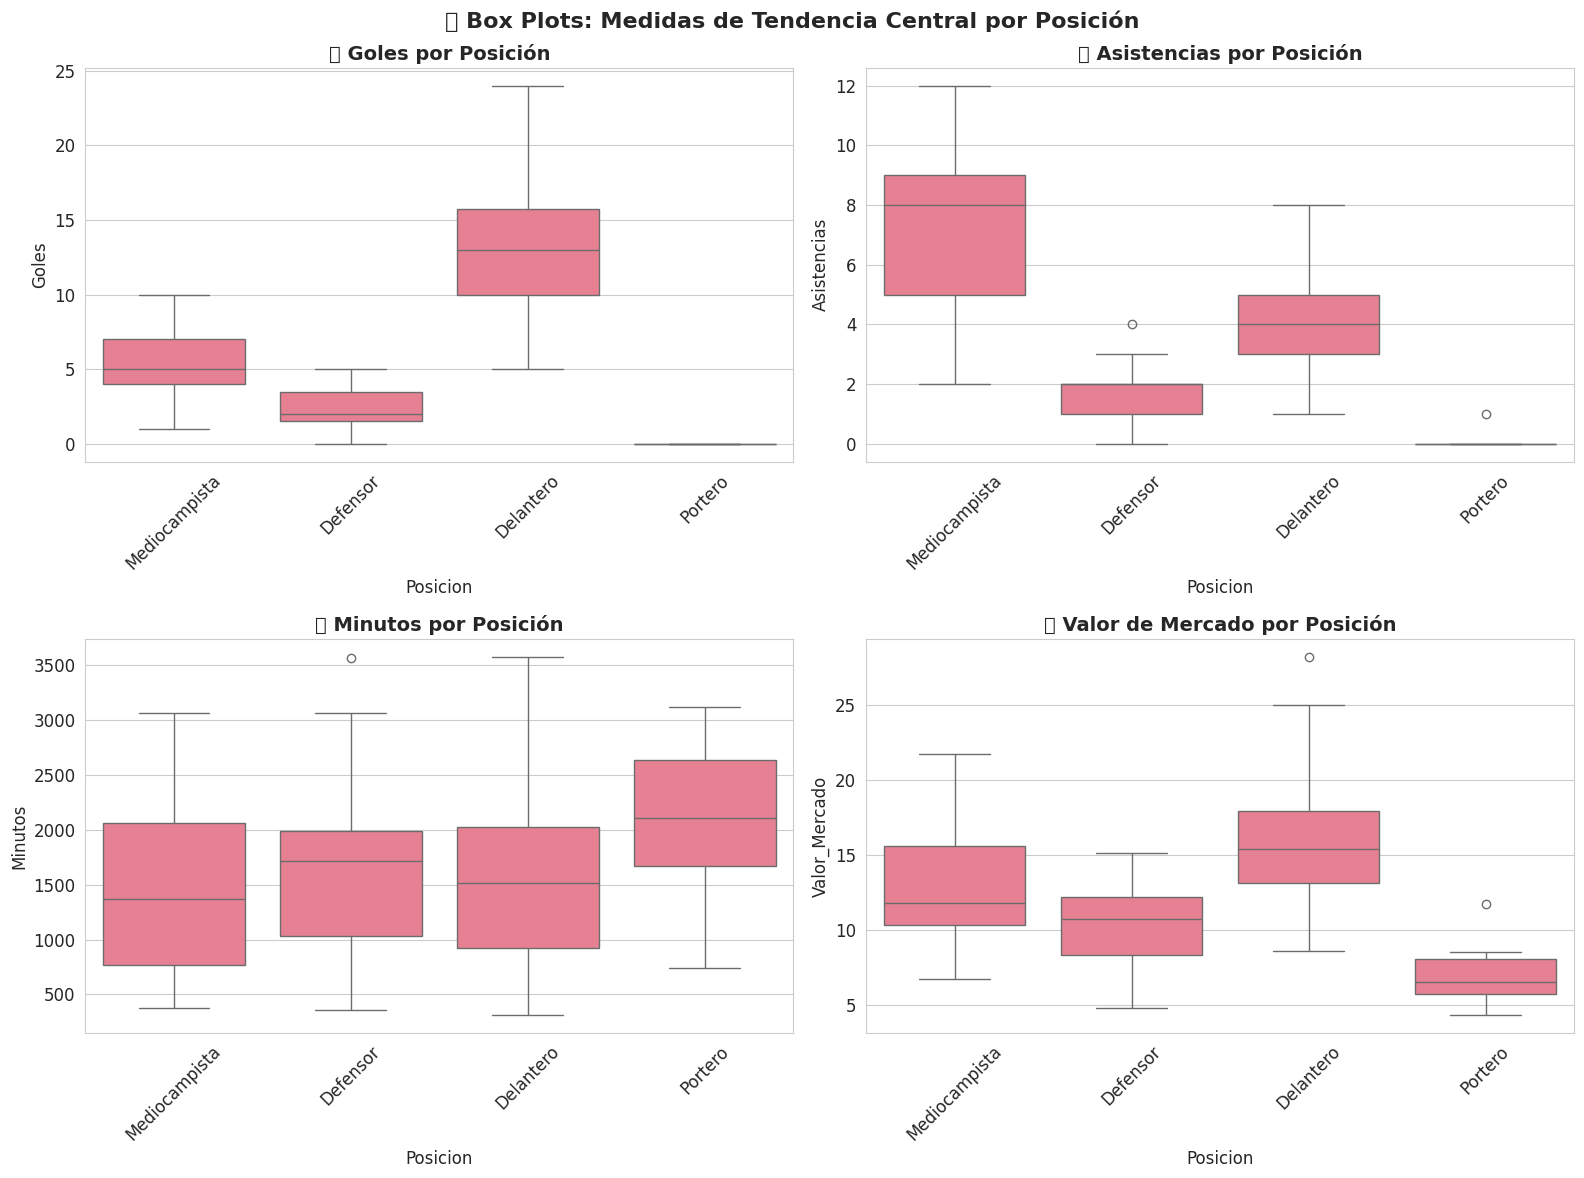


📊 COMPARACIÓN DE MEDIAS ENTRE POSICIONES

Goles:
  🥇 Delantero: 12.66
  🥈 Mediocampista: 5.27
  🥉 Defensor: 2.52
  4️⃣ Portero: 0.00
  📏 Diferencia máx-mín: 12.66
  📊 Coeficiente de variación: 107.01%

Asistencias:
  🥇 Mediocampista: 7.67
  🥈 Delantero: 4.08
  🥉 Defensor: 1.61
  4️⃣ Portero: 0.17
  📏 Diferencia máx-mín: 7.50
  📊 Coeficiente de variación: 97.11%

Minutos:
  🥇 Portero: 2069.50
  🥈 Defensor: 1660.48
  🥉 Delantero: 1571.82
  4️⃣ Mediocampista: 1425.48
  📏 Diferencia máx-mín: 644.02
  📊 Coeficiente de variación: 16.41%

Valor_Mercado:
  🥇 Delantero: 16.12
  🥈 Mediocampista: 12.85
  🥉 Defensor: 10.65
  4️⃣ Portero: 7.17
  📏 Diferencia máx-mín: 8.95
  📊 Coeficiente de variación: 32.18%


In [7]:
# Crear box plots para análisis por posición usando seaborn
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📦 Box Plots: Medidas de Tendencia Central por Posición', fontsize=16, fontweight='bold')

# Variables principales para box plots
variables_box = ['Goles', 'Asistencias', 'Minutos', 'Valor_Mercado']
titulos = ['⚽ Goles por Posición', '🎯 Asistencias por Posición', 
           '⏱️ Minutos por Posición', '💰 Valor de Mercado por Posición']

for i, (variable, titulo) in enumerate(zip(variables_box, titulos)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Crear box plot con seaborn
    sns.boxplot(data=df_jugadores, x='Posicion', y=variable, ax=ax)
    
    # Configurar el gráfico
    ax.set_title(titulo, fontsize=14, fontweight='bold')
    ax.set_ylabel(variable)
    
    # Rotar etiquetas si es necesario
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Comparación de medias entre posiciones
print("\n📊 COMPARACIÓN DE MEDIAS ENTRE POSICIONES")
print("=" * 50)

for variable in variables_box:
    print(f"\n{variable}:")
    medias_por_posicion = df_jugadores.groupby('Posicion')[variable].mean().sort_values(ascending=False)
    
    for i, (posicion, media) in enumerate(medias_por_posicion.items()):
        emoji = ["🥇", "🥈", "🥉", "4️⃣"][i] if i < 4 else str(i+1)
        print(f"  {emoji} {posicion}: {media:.2f}")
    
    # Encontrar la diferencia entre el máximo y mínimo
    diferencia = medias_por_posicion.max() - medias_por_posicion.min()
    print(f"  📏 Diferencia máx-mín: {diferencia:.2f}")
    
    # Coeficiente de variación entre posiciones
    cv = (medias_por_posicion.std() / medias_por_posicion.mean()) * 100
    print(f"  📊 Coeficiente de variación: {cv:.2f}%")

## 5. Análisis de Medidas de Dispersión

### 5.1 Introducción a las Medidas de Dispersión

Las medidas de dispersión nos indican **qué tan esparcidos o concentrados** están los datos alrededor de la medida de tendencia central. Son fundamentales para entender la **variabilidad** y **consistencia** del rendimiento.

### 5.2 Importancia en el Análisis Deportivo

En el contexto del fútbol, las medidas de dispersión nos permiten:

- 📊 **Evaluar consistencia**: ¿Un jugador es consistentemente bueno o tiene altibajos?
- 🎯 **Identificar confiabilidad**: ¿En qué jugadores podemos confiar?
- 📈 **Detectar variables importantes**: ¿Qué estadísticas son más estables?
- 🔍 **Comparar rendimiento**: ¿Qué equipo es más predecible?

### 5.3 Tipos de Medidas de Dispersión

#### **5.3.1 Rango (R)**
- **Definición**: Diferencia entre el valor máximo y mínimo
- **Fórmula**: R = Máximo - Mínimo
- **Ventaja**: Fácil de calcular y entender
- **Desventaja**: Sensible a valores extremos

#### **5.3.2 Varianza (σ²)**
- **Definición**: Promedio de las desviaciones al cuadrado respecto a la media
- **Fórmula**: σ² = Σ(x - μ)² / N
- **Interpretación**: Mayor varianza = mayor dispersión
- **Unidades**: Cuadrado de las unidades originales

#### **5.3.3 Desviación Estándar (σ)**
- **Definición**: Raíz cuadrada de la varianza
- **Fórmula**: σ = √σ²
- **Ventaja**: Mismas unidades que los datos originales
- **Interpretación**: 68% de los datos están dentro de ±1σ de la media

#### **5.3.4 Coeficiente de Variación (CV)**
- **Definición**: Desviación estándar relativa a la media
- **Fórmula**: CV = (σ/μ) × 100%
- **Ventaja**: Permite comparar variables con diferentes unidades
- **Interpretación**: CV < 15% = baja variabilidad, CV > 35% = alta variabilidad

#### **5.3.5 Rango Intercuartílico (IQR)**
- **Definición**: Diferencia entre el tercer y primer cuartil
- **Fórmula**: IQR = Q3 - Q1
- **Ventaja**: Robusto a valores extremos
- **Interpretación**: Contiene el 50% central de los datos

In [8]:
# Calcular medidas de dispersión para variables numéricas
def calcular_medidas_dispersion(serie, nombre_variable):
    """
    Calcula y muestra las medidas de dispersión para una serie de datos
    """
    print(f"\n📊 === {nombre_variable.upper()} - MEDIDAS DE DISPERSIÓN ===")
    
    # Medidas básicas
    rango = serie.max() - serie.min()
    varianza = serie.var()
    desviacion_std = serie.std()
    media = serie.mean()
    coef_variacion = (desviacion_std / media) * 100 if media != 0 else 0
    
    # Cuartiles y rango intercuartílico
    q1 = serie.quantile(0.25)
    q2 = serie.quantile(0.50)  # mediana
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    
    print(f"📏 Rango: {rango:.2f} (de {serie.min():.2f} a {serie.max():.2f})")
    print(f"📐 Varianza: {varianza:.2f}")
    print(f"📊 Desviación Estándar: {desviacion_std:.2f}")
    print(f"📈 Coeficiente de Variación: {coef_variacion:.2f}%")
    print(f"📦 Rango Intercuartílico (IQR): {iqr:.2f}")
    print(f"   - Q1 (25%): {q1:.2f}")
    print(f"   - Q2 (50%): {q2:.2f}")
    print(f"   - Q3 (75%): {q3:.2f}")
    
    # Interpretación del coeficiente de variación
    if coef_variacion < 15:
        interpretacion_cv = "Baja variabilidad 📉"
    elif coef_variacion < 35:
        interpretacion_cv = "Variabilidad moderada 📊"
    else:
        interpretacion_cv = "Alta variabilidad 📈"
    
    print(f"🔍 Interpretación CV: {interpretacion_cv}")
    
    # Detectar valores atípicos usando el método IQR
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    outliers = serie[(serie < limite_inferior) | (serie > limite_superior)]
    
    print(f"🚨 Valores atípicos detectados: {len(outliers)}")
    if len(outliers) > 0:
        print(f"   Valores: {outliers.tolist()}")
    
    return {
        'rango': rango,
        'varianza': varianza,
        'desviacion_std': desviacion_std,
        'coef_variacion': coef_variacion,
        'q1': q1,
        'q2': q2,
        'q3': q3,
        'iqr': iqr,
        'outliers': len(outliers)
    }

# Análisis de dispersión para las variables principales
print("📊 ANÁLISIS DE MEDIDAS DE DISPERSIÓN")
print("=" * 60)

variables_dispersion = ['Goles', 'Asistencias', 'Minutos', 'Partidos', 'Edad', 'Valor_Mercado']
resultados_dispersion = {}

for variable in variables_dispersion:
    resultados_dispersion[variable] = calcular_medidas_dispersion(
        df_jugadores[variable], 
        variable
    )

# Crear tabla resumen de dispersión
print("\n" + "=" * 60)
print("📋 RESUMEN DE MEDIDAS DE DISPERSIÓN")
print("=" * 60)

dispersion_df = pd.DataFrame(resultados_dispersion).T
dispersion_df.columns = ['Rango', 'Varianza', 'Desv_Std', 'CV(%)', 'Q1', 'Q2', 'Q3', 'IQR', 'Outliers']
print(dispersion_df.round(2))

📊 ANÁLISIS DE MEDIDAS DE DISPERSIÓN

📊 === GOLES - MEDIDAS DE DISPERSIÓN ===
📏 Rango: 24.00 (de 0.00 a 24.00)
📐 Varianza: 29.89
📊 Desviación Estándar: 5.47
📈 Coeficiente de Variación: 76.68%
📦 Rango Intercuartílico (IQR): 8.00
   - Q1 (25%): 3.00
   - Q2 (50%): 5.50
   - Q3 (75%): 11.00
🔍 Interpretación CV: Alta variabilidad 📈
🚨 Valores atípicos detectados: 1
   Valores: [24]

📊 === ASISTENCIAS - MEDIDAS DE DISPERSIÓN ===
📏 Rango: 12.00 (de 0.00 a 12.00)
📐 Varianza: 10.43
📊 Desviación Estándar: 3.23
📈 Coeficiente de Variación: 72.42%
📦 Rango Intercuartílico (IQR): 4.25
   - Q1 (25%): 2.00
   - Q2 (50%): 4.00
   - Q3 (75%): 6.25
🔍 Interpretación CV: Alta variabilidad 📈
🚨 Valores atípicos detectados: 0

📊 === MINUTOS - MEDIDAS DE DISPERSIÓN ===
📏 Rango: 3266.00 (de 311.00 a 3577.00)
📐 Varianza: 654824.07
📊 Desviación Estándar: 809.21
📈 Coeficiente de Variación: 51.42%
📦 Rango Intercuartílico (IQR): 1216.50
   - Q1 (25%): 859.50
   - Q2 (50%): 1514.00
   - Q3 (75%): 2076.00
🔍 Interpretaci

In [9]:
# Análisis de dispersión por posición
print("\n🎯 ANÁLISIS DE DISPERSIÓN POR POSICIÓN")
print("=" * 60)

# Función para comparar dispersión entre posiciones
def comparar_dispersion_posiciones(variable):
    print(f"\n📊 {variable.upper()} - DISPERSIÓN POR POSICIÓN")
    print("-" * 50)
    
    dispersion_por_pos = []
    
    for pos in posiciones:
        datos_pos = df_jugadores[df_jugadores['Posicion'] == pos][variable]
        
        if len(datos_pos) > 0:
            media = datos_pos.mean()
            std = datos_pos.std()
            cv = (std / media) * 100 if media != 0 else 0
            
            dispersion_por_pos.append({
                'Posicion': pos,
                'Media': media,
                'Desv_Std': std,
                'CV(%)': cv,
                'Min': datos_pos.min(),
                'Max': datos_pos.max(),
                'Rango': datos_pos.max() - datos_pos.min()
            })
    
    # Crear DataFrame y ordenar por coeficiente de variación
    df_disp = pd.DataFrame(dispersion_por_pos)
    df_disp = df_disp.sort_values('CV(%)')
    
    print("🏆 RANKING DE CONSISTENCIA (menor CV = más consistente):")
    for i, row in df_disp.iterrows():
        emoji = ["🥇", "🥈", "🥉", "4️⃣"][df_disp.index.get_loc(i)]
        print(f"{emoji} {row['Posicion']}: CV = {row['CV(%)']:.2f}% (σ = {row['Desv_Std']:.2f})")
    
    return df_disp

# Análisis para variables clave
variables_clave = ['Goles', 'Asistencias', 'Valor_Mercado']

resultados_pos = {}
for variable in variables_clave:
    resultados_pos[variable] = comparar_dispersion_posiciones(variable)

# Análisis de consistencia general
print("\n🔍 ANÁLISIS DE CONSISTENCIA GENERAL")
print("-" * 50)

# Encontrar la posición más consistente en promedio
consistencia_promedio = {}
for pos in posiciones:
    cvs = []
    for variable in variables_clave:
        pos_data = df_jugadores[df_jugadores['Posicion'] == pos][variable]
        if len(pos_data) > 0 and pos_data.mean() != 0:
            cv = (pos_data.std() / pos_data.mean()) * 100
            cvs.append(cv)
    
    if cvs:
        consistencia_promedio[pos] = np.mean(cvs)

# Ordenar por consistencia (menor CV promedio = más consistente)
consistencia_ordenada = sorted(consistencia_promedio.items(), key=lambda x: x[1])

print("🏆 RANKING DE CONSISTENCIA GENERAL:")
for i, (pos, cv_promedio) in enumerate(consistencia_ordenada):
    emoji = ["🥇", "🥈", "🥉", "4️⃣"][i]
    print(f"{emoji} {pos}: CV promedio = {cv_promedio:.2f}%")

print(f"\n✅ Posición MÁS consistente: {consistencia_ordenada[0][0]}")
print(f"❌ Posición MENOS consistente: {consistencia_ordenada[-1][0]}")

# Insights sobre dispersión
print("\n💡 INSIGHTS SOBRE DISPERSIÓN:")
print("-" * 50)

# Variable con mayor dispersión
cv_variables = {}
for variable in variables_dispersion:
    cv_variables[variable] = resultados_dispersion[variable]['coef_variacion']

var_mas_dispersa = max(cv_variables, key=cv_variables.get)
var_menos_dispersa = min(cv_variables, key=cv_variables.get)

print(f"📈 Variable con MAYOR dispersión: {var_mas_dispersa} (CV = {cv_variables[var_mas_dispersa]:.2f}%)")
print(f"📉 Variable con MENOR dispersión: {var_menos_dispersa} (CV = {cv_variables[var_menos_dispersa]:.2f}%)")

# Análisis de outliers
total_outliers = sum(resultados_dispersion[var]['outliers'] for var in variables_dispersion)
print(f"🚨 Total de valores atípicos detectados: {total_outliers}")


🎯 ANÁLISIS DE DISPERSIÓN POR POSICIÓN

📊 GOLES - DISPERSIÓN POR POSICIÓN
--------------------------------------------------
🏆 RANKING DE CONSISTENCIA (menor CV = más consistente):
🥇 Portero: CV = 0.00% (σ = 0.00)
🥈 Delantero: CV = 33.38% (σ = 4.23)
🥉 Mediocampista: CV = 46.04% (σ = 2.43)
4️⃣ Defensor: CV = 54.62% (σ = 1.38)

📊 ASISTENCIAS - DISPERSIÓN POR POSICIÓN
--------------------------------------------------
🏆 RANKING DE CONSISTENCIA (menor CV = más consistente):
🥇 Mediocampista: CV = 36.26% (σ = 2.78)
🥈 Delantero: CV = 43.92% (σ = 1.79)
🥉 Defensor: CV = 64.22% (σ = 1.03)
4️⃣ Portero: CV = 244.95% (σ = 0.41)

📊 VALOR_MERCADO - DISPERSIÓN POR POSICIÓN
--------------------------------------------------
🏆 RANKING DE CONSISTENCIA (menor CV = más consistente):
🥇 Defensor: CV = 26.27% (σ = 2.80)
🥈 Delantero: CV = 28.37% (σ = 4.57)
🥉 Mediocampista: CV = 29.67% (σ = 3.81)
4️⃣ Portero: CV = 36.54% (σ = 2.62)

🔍 ANÁLISIS DE CONSISTENCIA GENERAL
--------------------------------------------


📊 VISUALIZACIONES DE DISPERSIÓN


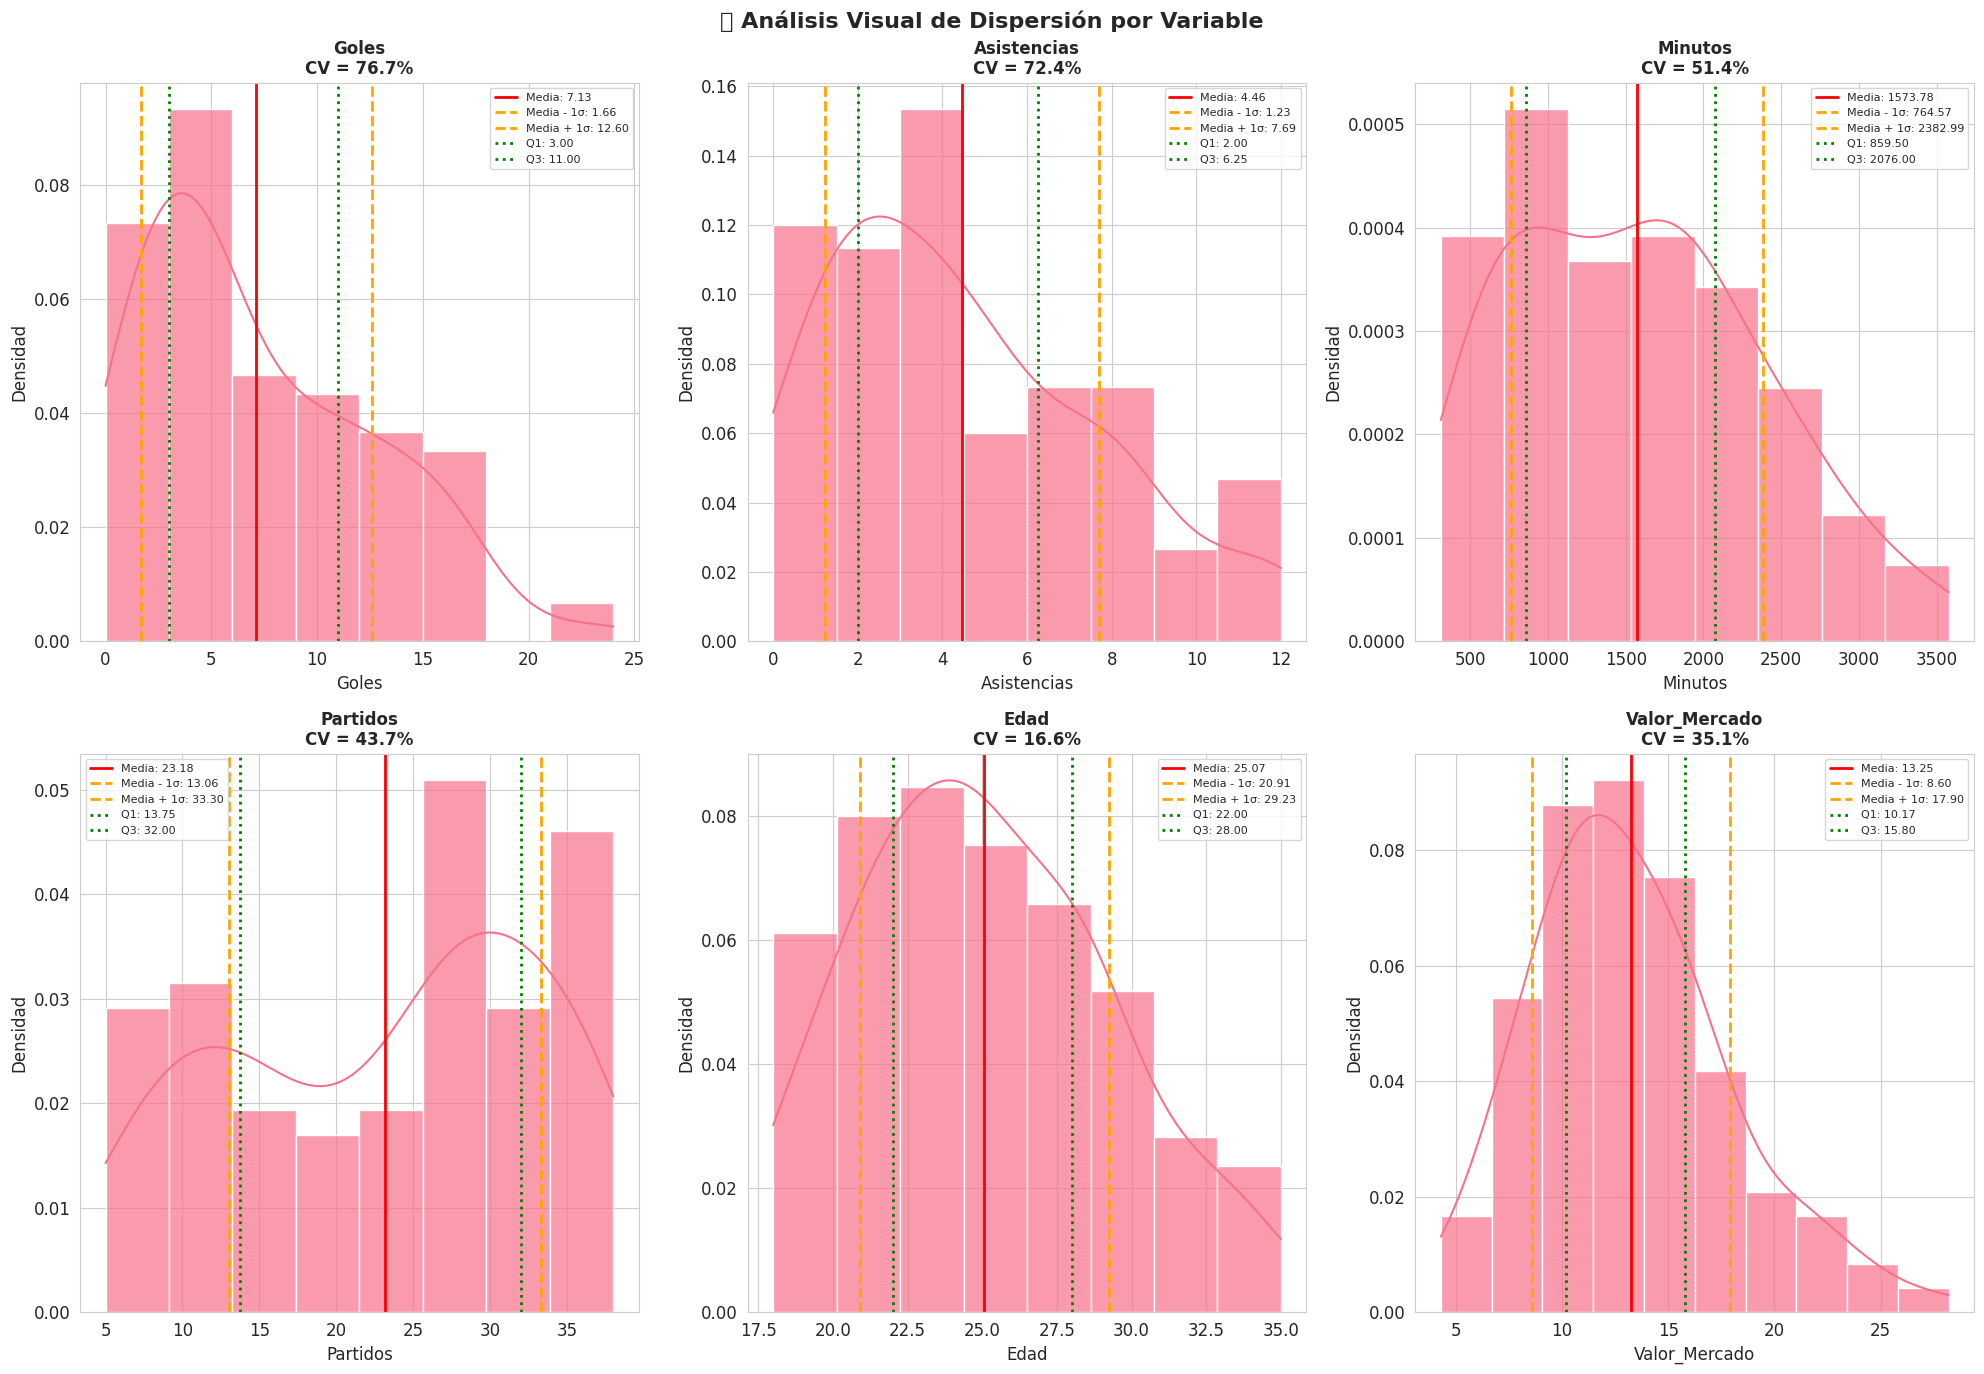

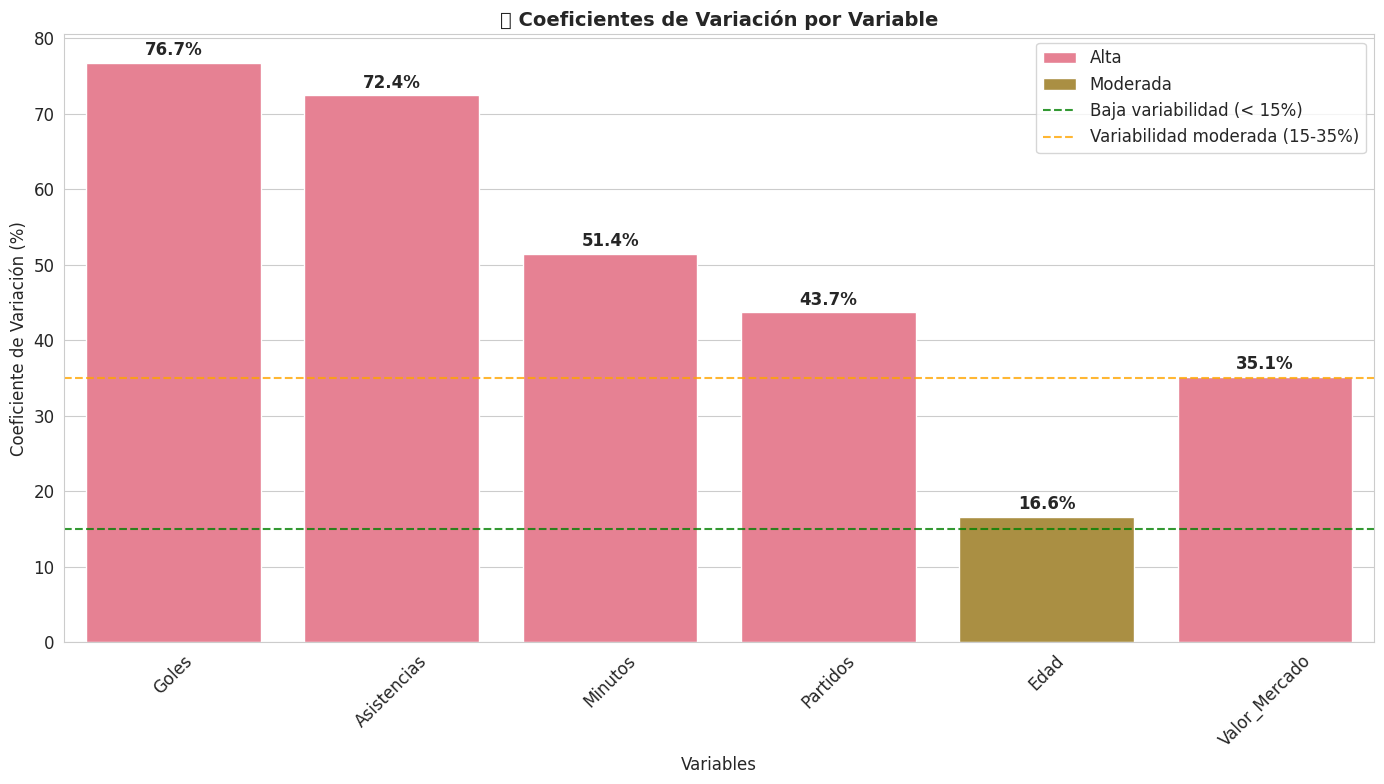

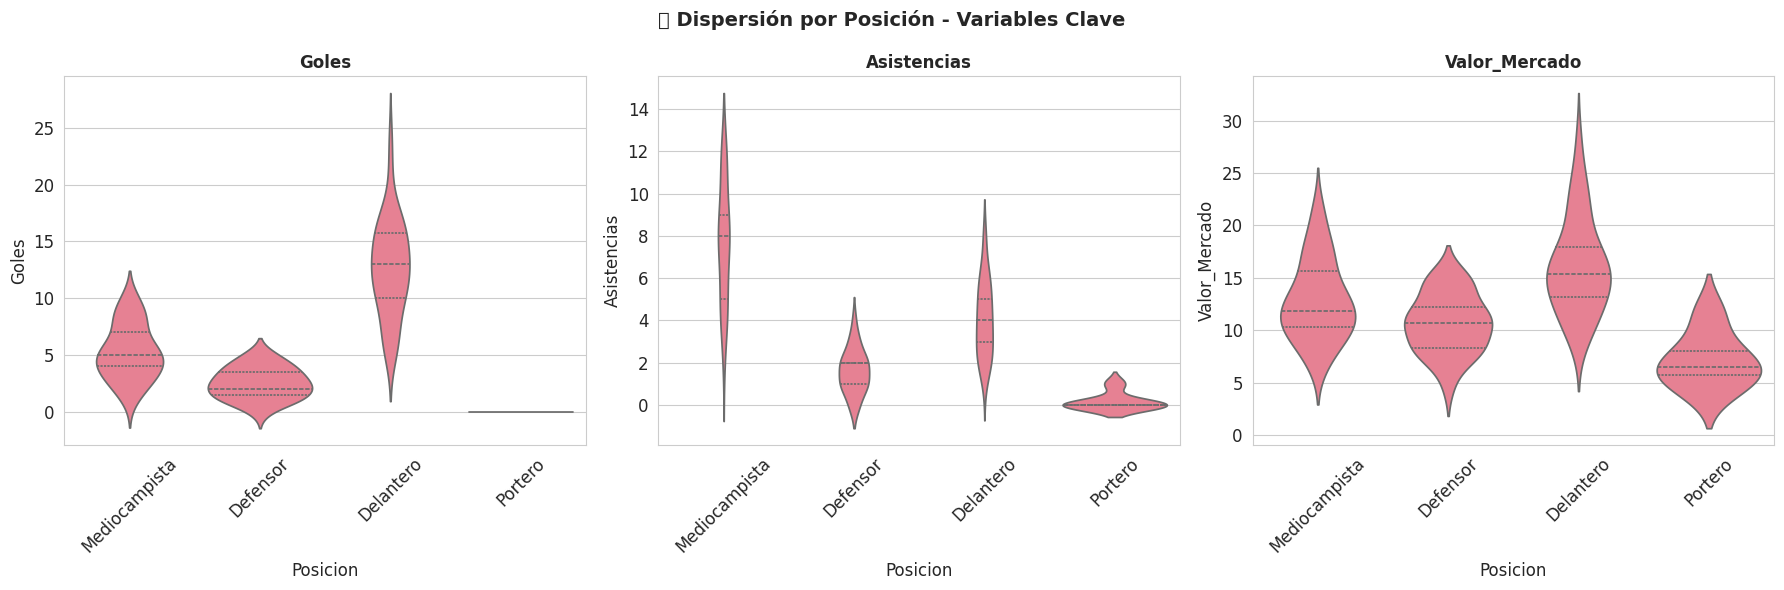

✅ Visualizaciones de dispersión completadas


In [10]:
# Visualizaciones de medidas de dispersión con seaborn
print("\n📊 VISUALIZACIONES DE DISPERSIÓN")
print("=" * 50)

# Crear gráficos de dispersión y distribución
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('📊 Análisis Visual de Dispersión por Variable', fontsize=16, fontweight='bold')

variables_viz_disp = ['Goles', 'Asistencias', 'Minutos', 'Partidos', 'Edad', 'Valor_Mercado']

for i, variable in enumerate(variables_viz_disp):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    data = df_jugadores[variable]
    
    # Crear histograma con KDE usando seaborn
    sns.histplot(data=df_jugadores, x=variable, kde=True, stat='density', ax=ax, alpha=0.7)
    
    # Calcular estadísticas
    media = data.mean()
    std = data.std()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    # Añadir líneas de referencia
    ax.axvline(media, color='red', linestyle='-', linewidth=2, label=f'Media: {media:.2f}')
    ax.axvline(media - std, color='orange', linestyle='--', linewidth=2, label=f'Media - 1σ: {media - std:.2f}')
    ax.axvline(media + std, color='orange', linestyle='--', linewidth=2, label=f'Media + 1σ: {media + std:.2f}')
    ax.axvline(q1, color='green', linestyle=':', linewidth=2, label=f'Q1: {q1:.2f}')
    ax.axvline(q3, color='green', linestyle=':', linewidth=2, label=f'Q3: {q3:.2f}')
    
    # Configurar el gráfico
    ax.set_title(f'{variable}\nCV = {(std/media)*100:.1f}%', fontsize=12, fontweight='bold')
    ax.set_xlabel(variable)
    ax.set_ylabel('Densidad')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Gráfico de barras para coeficientes de variación usando seaborn
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

variables_cv = list(cv_variables.keys())
valores_cv = list(cv_variables.values())

# Crear DataFrame para seaborn
cv_df = pd.DataFrame({
    'Variable': variables_cv,
    'CV': valores_cv
})

# Crear colores basados en el nivel de variabilidad
cv_df['Categoria'] = cv_df['CV'].apply(lambda x: 'Baja' if x < 15 else 'Moderada' if x < 35 else 'Alta')

# Crear gráfico de barras con seaborn
sns.barplot(data=cv_df, x='Variable', y='CV', hue='Categoria', ax=ax, dodge=False)

# Añadir líneas de referencia
ax.axhline(y=15, color='green', linestyle='--', alpha=0.8, label='Baja variabilidad (< 15%)')
ax.axhline(y=35, color='orange', linestyle='--', alpha=0.8, label='Variabilidad moderada (15-35%)')

# Añadir valores en las barras
for i, valor in enumerate(valores_cv):
    ax.text(i, valor + 0.5, f'{valor:.1f}%', ha='center', va='bottom', fontweight='bold')

ax.set_title('📊 Coeficientes de Variación por Variable', fontsize=14, fontweight='bold')
ax.set_ylabel('Coeficiente de Variación (%)')
ax.set_xlabel('Variables')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de dispersión por posición usando seaborn violin plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('📊 Dispersión por Posición - Variables Clave', fontsize=14, fontweight='bold')

for i, variable in enumerate(variables_clave):
    ax = axes[i]
    
    # Crear violin plot con seaborn
    sns.violinplot(data=df_jugadores, x='Posicion', y=variable, ax=ax, inner='quartile')
    
    # Configurar el gráfico
    ax.set_title(f'{variable}', fontsize=12, fontweight='bold')
    ax.set_ylabel(variable)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✅ Visualizaciones de dispersión completadas")

## 6. Ejercicios Prácticos

### 6.1 Ejercicios de Aplicación

Ahora que hemos aprendido sobre medidas de tendencia central y dispersión, vamos a aplicar estos conceptos con ejercicios prácticos:

#### **Ejercicio 1: Análisis de Jugador Específico**
- Selecciona un jugador al azar del dataset
- Compara sus estadísticas con las medidas de tendencia central
- Determina si es un jugador "típico" o "atípico"

#### **Ejercicio 2: Comparación de Posiciones**
- Analiza qué posición es más consistente en goles
- Determina qué posición tiene mayor variabilidad en valor de mercado
- Interpreta los resultados desde una perspectiva futbolística

#### **Ejercicio 3: Detección de Talentos**
- Identifica jugadores con rendimiento superior al promedio
- Busca jugadores con alta eficiencia (muchos goles/asistencias con pocos minutos)
- Analiza si hay correlación entre edad y rendimiento

### 5.4 Visualizaciones Estadísticas Avanzadas con Seaborn

Seaborn nos permite crear visualizaciones estadísticas más sofisticadas que nos ayudan a entender mejor las relaciones entre variables y la distribución de los datos en el contexto futbolístico.

🎨 VISUALIZACIONES ESTADÍSTICAS AVANZADAS CON SEABORN

📊 1. MATRIZ DE CORRELACIÓN ENTRE VARIABLES
--------------------------------------------------


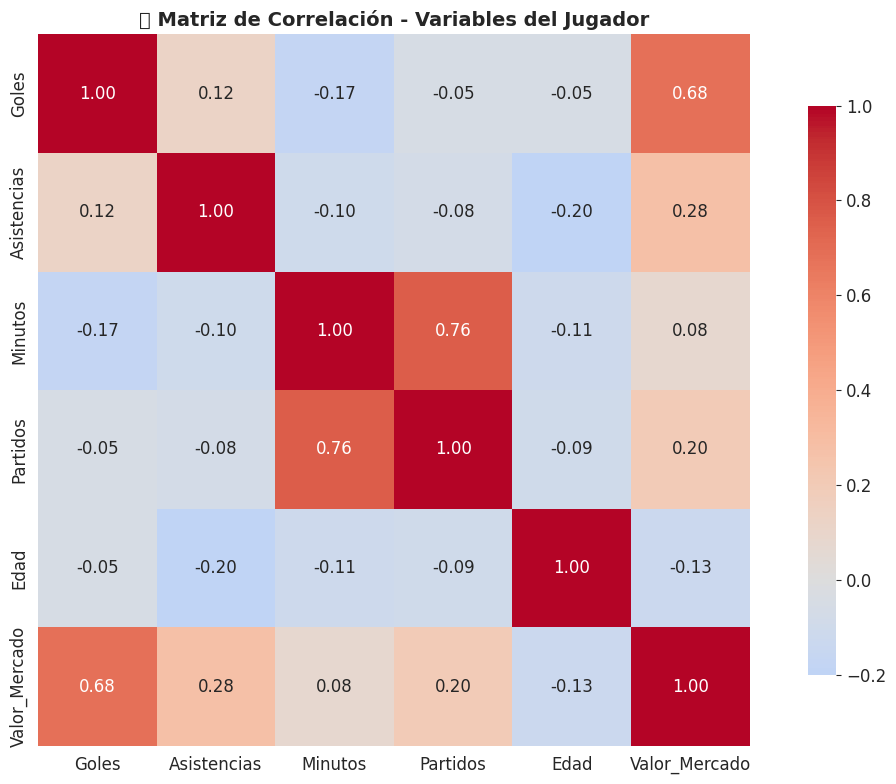

🔍 CORRELACIONES MÁS SIGNIFICATIVAS:
📈 Minutos ↔ Partidos: 0.757 (correlación positiva fuerte)
📈 Goles ↔ Valor_Mercado: 0.679 (correlación positiva fuerte)


📊 2. DISTRIBUCIONES POR POSICIÓN
--------------------------------------------------


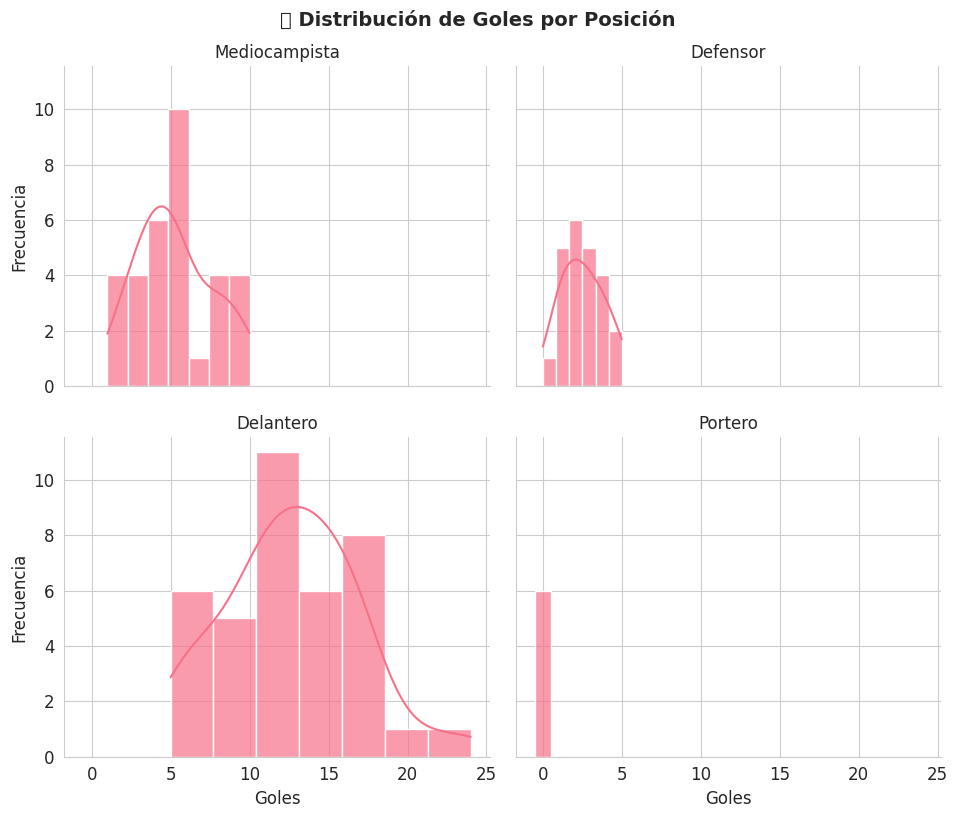


📊 3. ANÁLISIS DETALLADO DE RENDIMIENTO
--------------------------------------------------


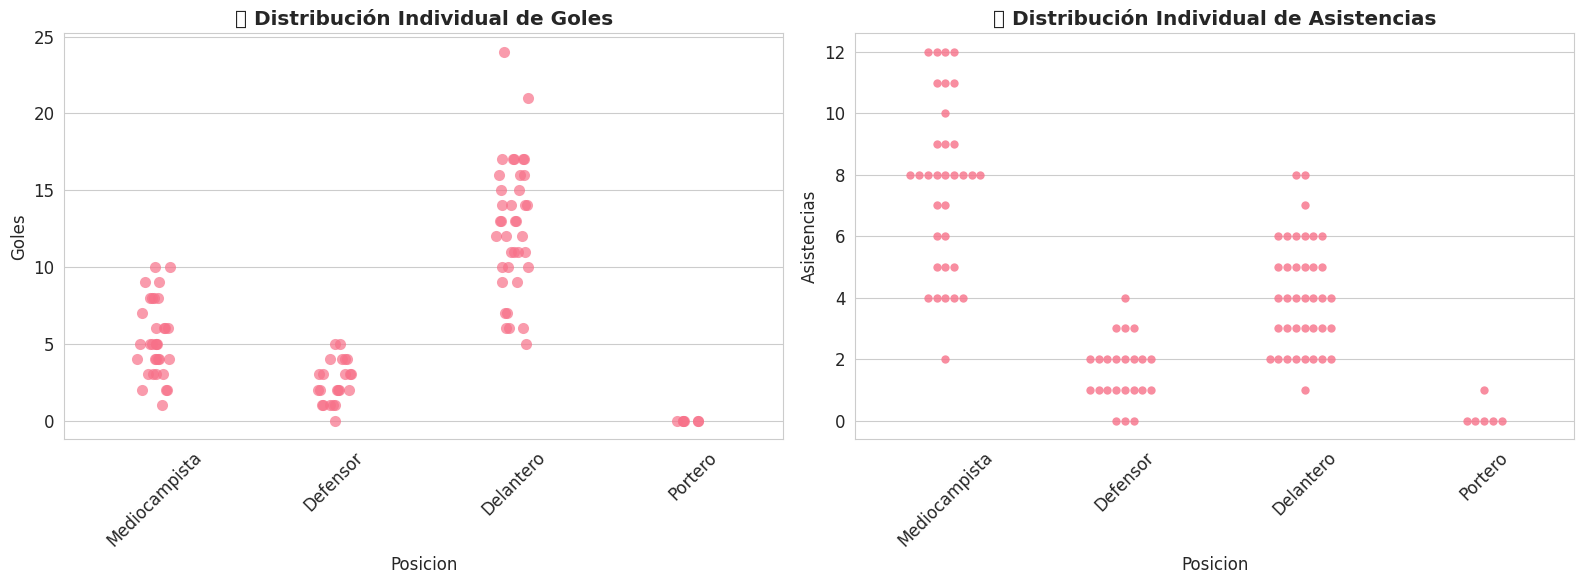


📊 4. ANÁLISIS DE DISTRIBUCIÓN AVANZADO
--------------------------------------------------


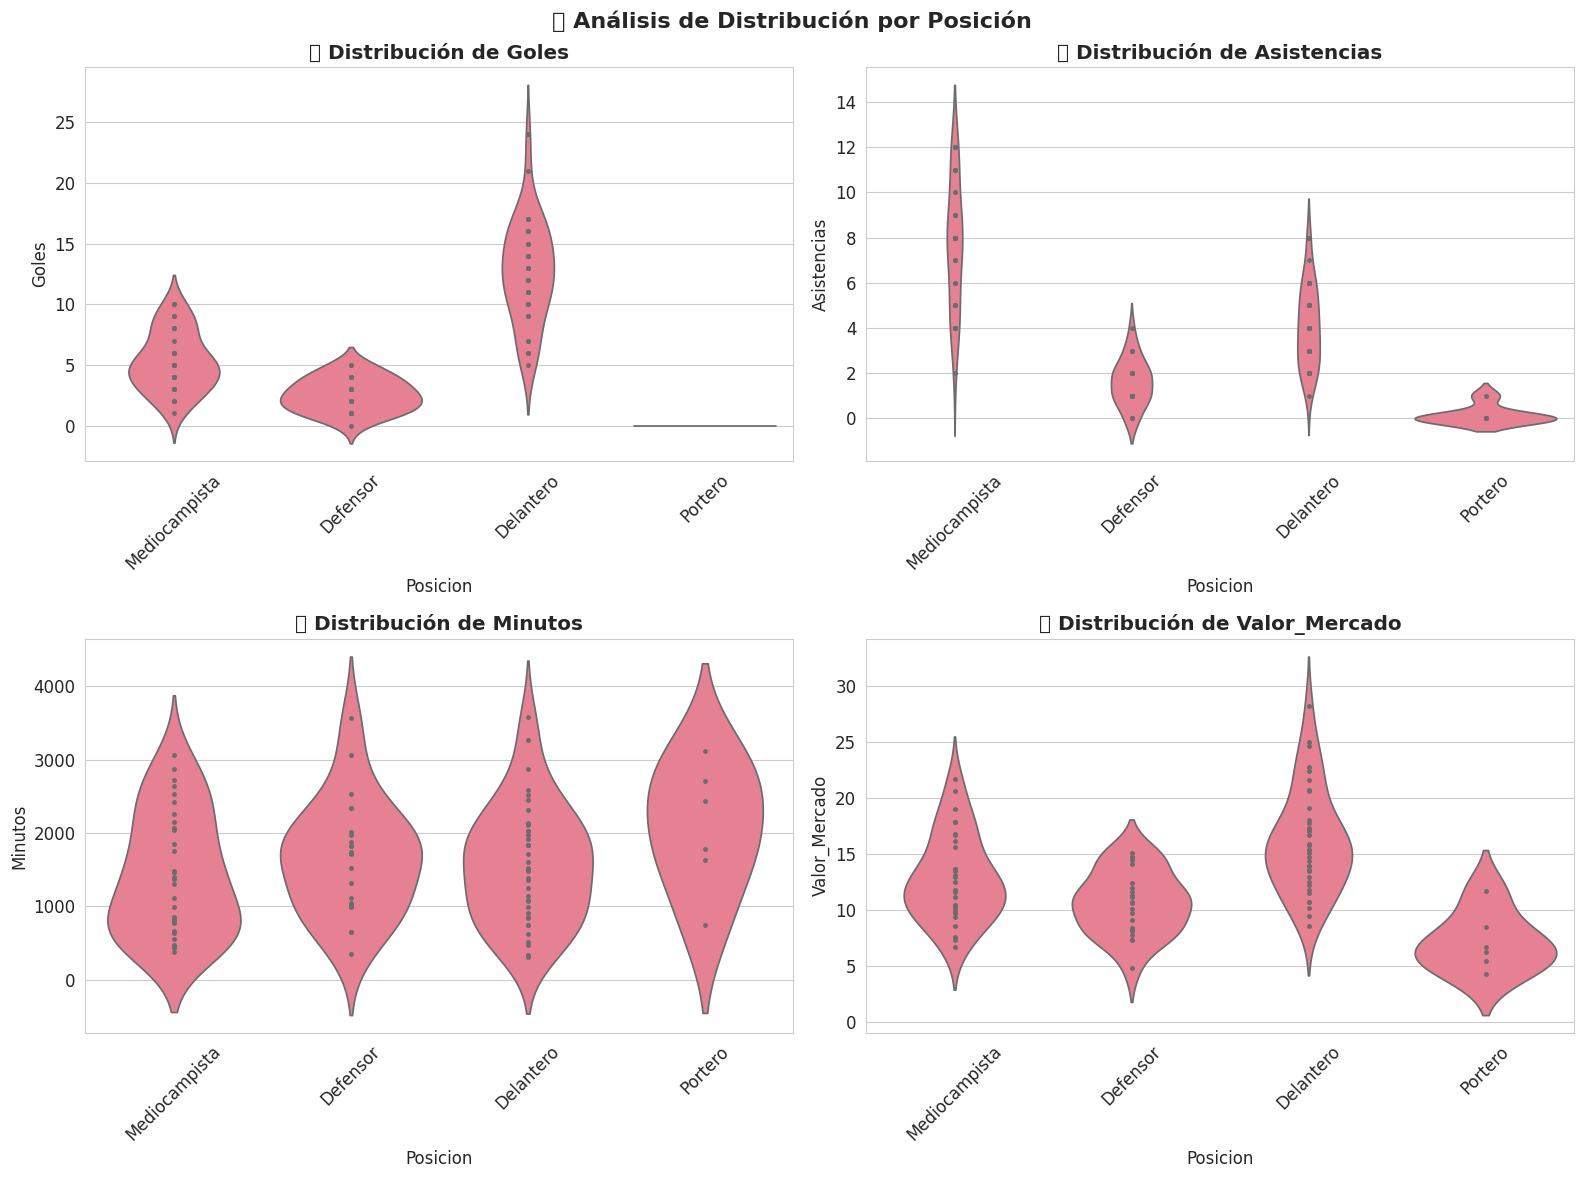


📊 5. RESUMEN ESTADÍSTICO VISUAL
--------------------------------------------------
📈 ESTADÍSTICAS POR POSICIÓN:
               Goles       Asistencias        Minutos         Partidos         \
                mean   std        mean   std     mean     std     mean    std   
Posicion                                                                        
Defensor        2.52  1.38        1.61  1.03  1660.48  783.44    25.22   9.54   
Delantero      12.66  4.23        4.08  1.79  1571.82  801.31    23.47  10.00   
Mediocampista   5.27  2.43        7.67  2.78  1425.48  820.21    21.12  10.91   
Portero         0.00  0.00        0.17  0.41  2069.50  856.26    24.83   8.80   

                Edad       Valor_Mercado        
                mean   std          mean   std  
Posicion                                        
Defensor       25.70  3.64         10.65  2.80  
Delantero      24.71  3.74         16.12  4.57  
Mediocampista  24.61  4.53         12.85  3.81  
Portero        27.50  6.1

In [11]:
# Visualizaciones estadísticas avanzadas con seaborn
print("🎨 VISUALIZACIONES ESTADÍSTICAS AVANZADAS CON SEABORN")
print("=" * 65)

# 1. Matriz de correlación con heatmap
print("\n📊 1. MATRIZ DE CORRELACIÓN ENTRE VARIABLES")
print("-" * 50)

# Seleccionar variables numéricas para correlación
variables_numericas = ['Goles', 'Asistencias', 'Minutos', 'Partidos', 'Edad', 'Valor_Mercado']
matriz_correlacion = df_jugadores[variables_numericas].corr()

# Crear heatmap de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, 
            annot=True,  # Mostrar valores
            cmap='coolwarm',  # Paleta de colores
            center=0,  # Centrar en 0
            square=True,  # Celdas cuadradas
            fmt='.2f',  # Formato de números
            cbar_kws={'shrink': 0.8})
plt.title('🔥 Matriz de Correlación - Variables del Jugador', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Interpretación de correlaciones
print("🔍 CORRELACIONES MÁS SIGNIFICATIVAS:")
# Encontrar correlaciones fuertes (> 0.5 o < -0.5)
correlaciones_fuertes = []
for i in range(len(matriz_correlacion.columns)):
    for j in range(i+1, len(matriz_correlacion.columns)):
        var1 = matriz_correlacion.columns[i]
        var2 = matriz_correlacion.columns[j]
        corr_value = matriz_correlacion.iloc[i, j]
        if abs(corr_value) > 0.5:
            correlaciones_fuertes.append((var1, var2, corr_value))

for var1, var2, corr in sorted(correlaciones_fuertes, key=lambda x: abs(x[2]), reverse=True):
    if corr > 0:
        print(f"📈 {var1} ↔ {var2}: {corr:.3f} (correlación positiva fuerte)")
    else:
        print(f"📉 {var1} ↔ {var2}: {corr:.3f} (correlación negativa fuerte)")

# 2. Distribuciones por posición usando FacetGrid
print("\n\n📊 2. DISTRIBUCIONES POR POSICIÓN")
print("-" * 50)

# Crear un gráfico de distribuciones múltiples
g = sns.FacetGrid(df_jugadores, col='Posicion', col_wrap=2, height=4, aspect=1.2)
g.map(sns.histplot, 'Goles', kde=True, alpha=0.7)
g.set_axis_labels('Goles', 'Frecuencia')
g.set_titles('{col_name}')
g.add_legend()
plt.suptitle('⚽ Distribución de Goles por Posición', y=1.02, fontsize=14, fontweight='bold')
plt.show()

# 3. Comparación de rendimiento con strip plot y swarm plot
print("\n📊 3. ANÁLISIS DETALLADO DE RENDIMIENTO")
print("-" * 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Strip plot para ver todos los puntos
sns.stripplot(data=df_jugadores, x='Posicion', y='Goles', ax=ax1, size=8, alpha=0.7)
ax1.set_title('📍 Distribución Individual de Goles', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# Swarm plot para evitar superposición
sns.swarmplot(data=df_jugadores, x='Posicion', y='Asistencias', ax=ax2, size=6, alpha=0.8)
ax2.set_title('🎯 Distribución Individual de Asistencias', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4. Análisis de distribución con violin plots mejorados
print("\n📊 4. ANÁLISIS DE DISTRIBUCIÓN AVANZADO")
print("-" * 50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
variables_distribucion = ['Goles', 'Asistencias', 'Minutos', 'Valor_Mercado']

for i, variable in enumerate(variables_distribucion):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Violin plot con puntos internos
    sns.violinplot(data=df_jugadores, x='Posicion', y=variable, ax=ax, inner='points')
    ax.set_title(f'🎻 Distribución de {variable}', fontweight='bold')
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('📊 Análisis de Distribución por Posición', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. Resumen estadístico visual
print("\n📊 5. RESUMEN ESTADÍSTICO VISUAL")
print("-" * 50)

# Crear un resumen estadístico usando seaborn
estadisticas_por_posicion = df_jugadores.groupby('Posicion')[variables_numericas].agg(['mean', 'std']).round(2)

print("📈 ESTADÍSTICAS POR POSICIÓN:")
print(estadisticas_por_posicion)

print("\n✅ Visualizaciones avanzadas completadas")
print("\n💡 INSIGHTS DE LAS VISUALIZACIONES AVANZADAS:")
print("-" * 55)
print("🔍 La matriz de correlación revela relaciones entre variables")
print("📊 Los violin plots muestran la forma completa de las distribuciones")
print("🎯 Los strip/swarm plots permiten ver valores individuales")
print("📈 Las facetas facilitan comparaciones entre grupos")
print("🎨 Seaborn automatiza el análisis estadístico visual")

In [12]:
# SOLUCIONES A LOS EJERCICIOS PRÁCTICOS

print("🎯 EJERCICIOS PRÁCTICOS - ESTADÍSTICA DESCRIPTIVA")
print("=" * 60)

# EJERCICIO 1: Análisis de Jugador Específico
print("\n🏃‍♂️ EJERCICIO 1: ANÁLISIS DE JUGADOR ESPECÍFICO")
print("-" * 50)

# Seleccionar un jugador al azar
jugador_aleatorio = df_jugadores.sample(1).iloc[0]
print(f"Jugador seleccionado: {jugador_aleatorio['Nombre']}")
print(f"Posición: {jugador_aleatorio['Posicion']}")
print(f"Edad: {jugador_aleatorio['Edad']} años")

# Comparar con promedios generales
print("\n📊 Comparación con promedios generales:")
variables_comparar = ['Goles', 'Asistencias', 'Minutos', 'Valor_Mercado']

for variable in variables_comparar:
    valor_jugador = jugador_aleatorio[variable]
    media_general = df_jugadores[variable].mean()
    desv_general = df_jugadores[variable].std()
    
    # Calcular z-score
    z_score = (valor_jugador - media_general) / desv_general
    
    print(f"\n{variable}:")
    print(f"  Valor del jugador: {valor_jugador:.2f}")
    print(f"  Media general: {media_general:.2f}")
    print(f"  Z-score: {z_score:.2f}")
    
    if abs(z_score) < 1:
        categoria = "Típico 😐"
    elif abs(z_score) < 2:
        categoria = "Atípico moderado 😊" if z_score > 0 else "Atípico moderado 😔"
    else:
        categoria = "Muy atípico 🔥" if z_score > 0 else "Muy atípico 📉"
    
    print(f"  Categoría: {categoria}")

# EJERCICIO 2: Comparación de Posiciones
print("\n\n⚽ EJERCICIO 2: COMPARACIÓN DE POSICIONES")
print("-" * 50)

# Consistencia en goles
print("\n🎯 Consistencia en goles (menor CV = más consistente):")
consistencia_goles = df_jugadores.groupby('Posicion')['Goles'].agg(['mean', 'std']).reset_index()
consistencia_goles['CV'] = (consistencia_goles['std'] / consistencia_goles['mean']) * 100
consistencia_goles = consistencia_goles.sort_values('CV')

for i, row in consistencia_goles.iterrows():
    emoji = ["🥇", "🥈", "🥉", "4️⃣"][i]
    print(f"{emoji} {row['Posicion']}: CV = {row['CV']:.2f}%")

# Variabilidad en valor de mercado
print("\n💰 Variabilidad en valor de mercado:")
variabilidad_valor = df_jugadores.groupby('Posicion')['Valor_Mercado'].agg(['mean', 'std']).reset_index()
variabilidad_valor['CV'] = (variabilidad_valor['std'] / variabilidad_valor['mean']) * 100
variabilidad_valor = variabilidad_valor.sort_values('CV', ascending=False)

for i, row in variabilidad_valor.iterrows():
    emoji = ["🔥", "🔶", "🔸", "🔹"][i]
    print(f"{emoji} {row['Posicion']}: CV = {row['CV']:.2f}% (más variable)")

# EJERCICIO 3: Detección de Talentos
print("\n\n🌟 EJERCICIO 3: DETECCIÓN DE TALENTOS")
print("-" * 50)

# Jugadores con rendimiento superior al promedio
print("\n⭐ Jugadores con rendimiento superior al promedio:")

# Crear índice de rendimiento combinado
df_jugadores['Indice_Rendimiento'] = (
    (df_jugadores['Goles'] / df_jugadores['Goles'].mean()) * 0.4 +
    (df_jugadores['Asistencias'] / df_jugadores['Asistencias'].mean()) * 0.3 +
    (df_jugadores['Minutos'] / df_jugadores['Minutos'].mean()) * 0.3
)

# Top 5 jugadores
top_jugadores = df_jugadores.nlargest(5, 'Indice_Rendimiento')
print("\n🏆 TOP 5 JUGADORES POR RENDIMIENTO:")
for i, jugador in top_jugadores.iterrows():
    print(f"{i+1}. {jugador['Nombre']} ({jugador['Posicion']}) - Índice: {jugador['Indice_Rendimiento']:.2f}")

# Jugadores eficientes (muchos goles/asistencias con pocos minutos)
print("\n⚡ Jugadores más eficientes:")
df_jugadores['Eficiencia_Goles'] = df_jugadores['Goles'] / (df_jugadores['Minutos'] / 90)  # Goles por 90 min
df_jugadores['Eficiencia_Asistencias'] = df_jugadores['Asistencias'] / (df_jugadores['Minutos'] / 90)

# Filtrar jugadores con al menos 500 minutos
jugadores_activos = df_jugadores[df_jugadores['Minutos'] >= 500]

top_eficientes_goles = jugadores_activos.nlargest(3, 'Eficiencia_Goles')
print("\n🎯 TOP 3 MÁS EFICIENTES EN GOLES:")
for i, jugador in top_eficientes_goles.iterrows():
    print(f"{i+1}. {jugador['Nombre']} - {jugador['Eficiencia_Goles']:.2f} goles/90min")

# Análisis de correlación edad-rendimiento
print("\n👶 Análisis edad vs rendimiento:")
correlacion_edad_goles = df_jugadores['Edad'].corr(df_jugadores['Goles'])
correlacion_edad_asistencias = df_jugadores['Edad'].corr(df_jugadores['Asistencias'])

print(f"Correlación edad-goles: {correlacion_edad_goles:.3f}")
print(f"Correlación edad-asistencias: {correlacion_edad_asistencias:.3f}")

if abs(correlacion_edad_goles) < 0.1:
    interpretacion = "No hay correlación significativa"
elif correlacion_edad_goles > 0:
    interpretacion = "Correlación positiva débil"
else:
    interpretacion = "Correlación negativa débil"

print(f"Interpretación: {interpretacion}")

print("\n✅ Ejercicios completados!")

🎯 EJERCICIOS PRÁCTICOS - ESTADÍSTICA DESCRIPTIVA

🏃‍♂️ EJERCICIO 1: ANÁLISIS DE JUGADOR ESPECÍFICO
--------------------------------------------------
Jugador seleccionado: Jugador_026
Posición: Delantero
Edad: 24 años

📊 Comparación con promedios generales:

Goles:
  Valor del jugador: 6.00
  Media general: 7.13
  Z-score: -0.21
  Categoría: Típico 😐

Asistencias:
  Valor del jugador: 2.00
  Media general: 4.46
  Z-score: -0.76
  Categoría: Típico 😐

Minutos:
  Valor del jugador: 1829.00
  Media general: 1573.78
  Z-score: 0.32
  Categoría: Típico 😐

Valor_Mercado:
  Valor del jugador: 11.80
  Media general: 13.25
  Z-score: -0.31
  Categoría: Típico 😐


⚽ EJERCICIO 2: COMPARACIÓN DE POSICIONES
--------------------------------------------------

🎯 Consistencia en goles (menor CV = más consistente):
🥈 Delantero: CV = 33.38%
🥉 Mediocampista: CV = 46.04%
🥇 Defensor: CV = 54.62%
4️⃣ Portero: CV = nan%

💰 Variabilidad en valor de mercado:
🔹 Portero: CV = 36.54% (más variable)
🔸 Mediocampist

## 7. Conclusiones y Resumen

### 7.1 Conceptos Clave Aprendidos

En esta sesión hemos cubierto los fundamentos esenciales de la estadística descriptiva aplicada al fútbol:

#### **📊 Medidas de Tendencia Central**
- **Media**: Valor promedio, útil para comparaciones generales
- **Mediana**: Valor central, resistente a valores extremos
- **Moda**: Valor más frecuente, útil para identificar patrones comunes

#### **📈 Medidas de Dispersión**
- **Rango**: Diferencia entre máximo y mínimo
- **Varianza y Desviación Estándar**: Medidas de variabilidad absoluta
- **Coeficiente de Variación**: Medida de variabilidad relativa
- **Rango Intercuartílico**: Medida robusta de dispersión

#### **🔍 Interpretación Práctica**
- **Distribuciones**: Simétricas vs sesgadas
- **Consistencia**: Importancia de la variabilidad en el rendimiento
- **Valores atípicos**: Identificación de jugadores excepcionales
- **Comparaciones**: Entre posiciones, equipos y jugadores

### 7.2 Aplicaciones en el Fútbol

#### **Para Entrenadores:**
- Evaluar la consistencia de jugadores
- Identificar fortalezas y debilidades por posición
- Tomar decisiones basadas en datos

#### **Para Analistas:**
- Crear perfiles de jugadores
- Detectar talentos y oportunidades
- Generar reportes estadísticos comprensibles

#### **Para Aficionados:**
- Entender mejor las estadísticas del fútbol
- Interpretar datos de rendimiento
- Hacer análisis más profundos del juego

### 7.3 Herramientas Utilizadas

- **Python**: Lenguaje de programación para análisis
- **Pandas**: Manipulación y análisis de datos
- **NumPy**: Cálculos numéricos y estadísticos
- **Seaborn**: Visualización estadística moderna y elegante
- **Matplotlib**: Base para visualizaciones (complemento a seaborn)
- **SciPy**: Funciones estadísticas avanzadas

#### **🎨 Ventajas de Seaborn para Estadística Descriptiva:**
- **Menos código**: Gráficos complejos en una línea
- **Estadísticas automáticas**: KDE, cuartiles, outliers incluidos
- **Integración pandas**: Manejo directo de DataFrames
- **Estilos profesionales**: Colores y formato consistentes
- **Análisis por grupos**: Automático con variables categóricas

### 7.4 Próximos Pasos

En las siguientes sesiones continuaremos con:
- **Análisis de correlación**: Relaciones entre variables
- **Pruebas estadísticas**: Comparaciones significativas
- **Modelado predictivo**: Predicciones basadas en datos
- **Visualización avanzada**: Gráficos interactivos y dashboards

---

### 💡 Puntos Clave para Recordar

1. **La estadística descriptiva resume y organiza datos de manera comprensible**
2. **Las medidas de tendencia central nos dicen "dónde está el centro"**
3. **Las medidas de dispersión nos dicen "qué tan esparcidos están los datos"**
4. **Seaborn simplifica significativamente las visualizaciones estadísticas**
5. **La visualización es fundamental para interpretar datos**
6. **El contexto deportivo es crucial para la interpretación correcta**
7. **La consistencia puede ser tan importante como el rendimiento promedio**

---

### 🎯 Ejercicios Adicionales Sugeridos

1. **Analiza tu equipo favorito**: Aplica estos conceptos a datos reales
2. **Compara ligas**: Utiliza datos de diferentes competiciones
3. **Análisis temporal**: Estudia cómo cambian las estadísticas a lo largo del tiempo
4. **Crea tus propias visualizaciones**: Experimenta con diferentes tipos de gráficos seaborn
5. **Explora correlaciones**: Busca relaciones interesantes entre variables

---

### 🔧 Herramientas de Seaborn Aprendidas

- **sns.histplot()**: Histogramas con KDE automático
- **sns.boxplot()**: Box plots elegantes por categorías
- **sns.violinplot()**: Distribuciones completas visibles
- **sns.heatmap()**: Matrices de correlación visuales
- **sns.stripplot()/swarmplot()**: Puntos individuales sin superposición
- **sns.FacetGrid()**: Múltiples gráficos por categorías

---

**¡Felicitaciones!** Has completado exitosamente el módulo de Estadística Descriptiva aplicada al fútbol con herramientas modernas. Ahora tienes las herramientas fundamentales para analizar datos deportivos de manera profesional y crear visualizaciones estadísticas impactantes.